## Import Libraries

Import all necessary Python libraries for data manipulation, statistical modeling (GLM, GAM), and visualization.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
!pip install pygam
from pygam import LinearGAM, s, f
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Libraries imported successfully.")

Libraries imported successfully.


## Load Dataset

Load the 'Star98 dataset' into a pandas DataFrame.


In [ ]:
loaded_data = sm.datasets.star98.load_pandas()
df = loaded_data.data
print("Dataset loaded successfully.")
print(df.head())

Dataset loaded successfully.
   NABOVE  NBELOW    LOWINC   PERASIAN   PERBLACK    PERHISP  PERMINTE  \
0   452.0   355.0  34.39730  23.299300  14.235280  11.411120  15.91837   
1   144.0    40.0  17.36507  29.328380   8.234897   9.314884  13.63636   
2   337.0   234.0  32.64324   9.226386  42.406310  13.543720  28.83436   
3   395.0   178.0  11.90953  13.883090   3.796973  11.443110  11.11111   
4     8.0    57.0  36.88889  12.187500  76.875000   7.604167  43.58974   

   AVYRSEXP    AVSALK  PERSPENK  ...  PCTCHRT   PCTYRRND  PERMINTE_AVYRSEXP  \
0  14.70646  59.15732  4.445207  ...      0.0  22.222220         234.102872   
1  16.08324  59.50397  5.267598  ...      0.0   0.000000         219.316851   
2  14.59559  60.56992  5.482922  ...      0.0   0.000000         420.854496   
3  14.38939  58.33411  4.165093  ...      0.0   7.142857         159.882095   
4  13.90568  63.15364  4.324902  ...      0.0   0.000000         606.144976   

   PERMINTE_AVSAL  AVYRSEXP_AVSAL  PERSPEN_PTRATIO 

## Perform EDA

Conduct Exploratory Data Analysis including descriptive statistics, checking for missing values, and visualizing distributions of key variables to understand the dataset's characteristics.



To begin the EDA process, I will display the descriptive statistics, check for missing values, and print the data types of the DataFrame `df` as per the instructions. This will provide a foundational understanding of the dataset's numerical summaries, data completeness, and variable types.



In [ ]:
print("### Descriptive Statistics:\n")
print(df.describe())

print("\n### Missing Values:\n")
print(df.isnull().sum())

print("\n### Data Types:\n")
df.info()

### Descriptive Statistics:

            NABOVE        NBELOW      LOWINC    PERASIAN    PERBLACK  \
count   303.000000    303.000000  303.000000  303.000000  303.000000   
mean    357.815182    525.389439   41.409877    5.896335    5.636808   
std     660.911376   1771.323315   20.467312    8.818136    8.795594   
min       4.000000     14.000000    0.000000    0.000000    0.000000   
25%      72.500000     98.000000   26.683040    0.877325    0.851290   
50%     199.000000    212.000000   40.236070    2.107896    2.179380   
75%     421.000000    542.500000   55.460075    7.184805    5.955982   
max    9324.000000  29528.000000   92.334500   63.202340   76.875000   

          PERHISP    PERMINTE    AVYRSEXP      AVSALK    PERSPENK  ...  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  ...   
mean    34.398080   14.694747   14.253875   58.640258    4.320310  ...   
std     24.938683   12.307611    1.897354    5.243259    0.590411  ...   
min      2.251407    0.000


Now that the descriptive statistics, missing values, and data types have been checked, the next step in EDA is to visualize the distributions of key numerical variables using histograms and box plots to understand their characteristics and identify potential outliers.



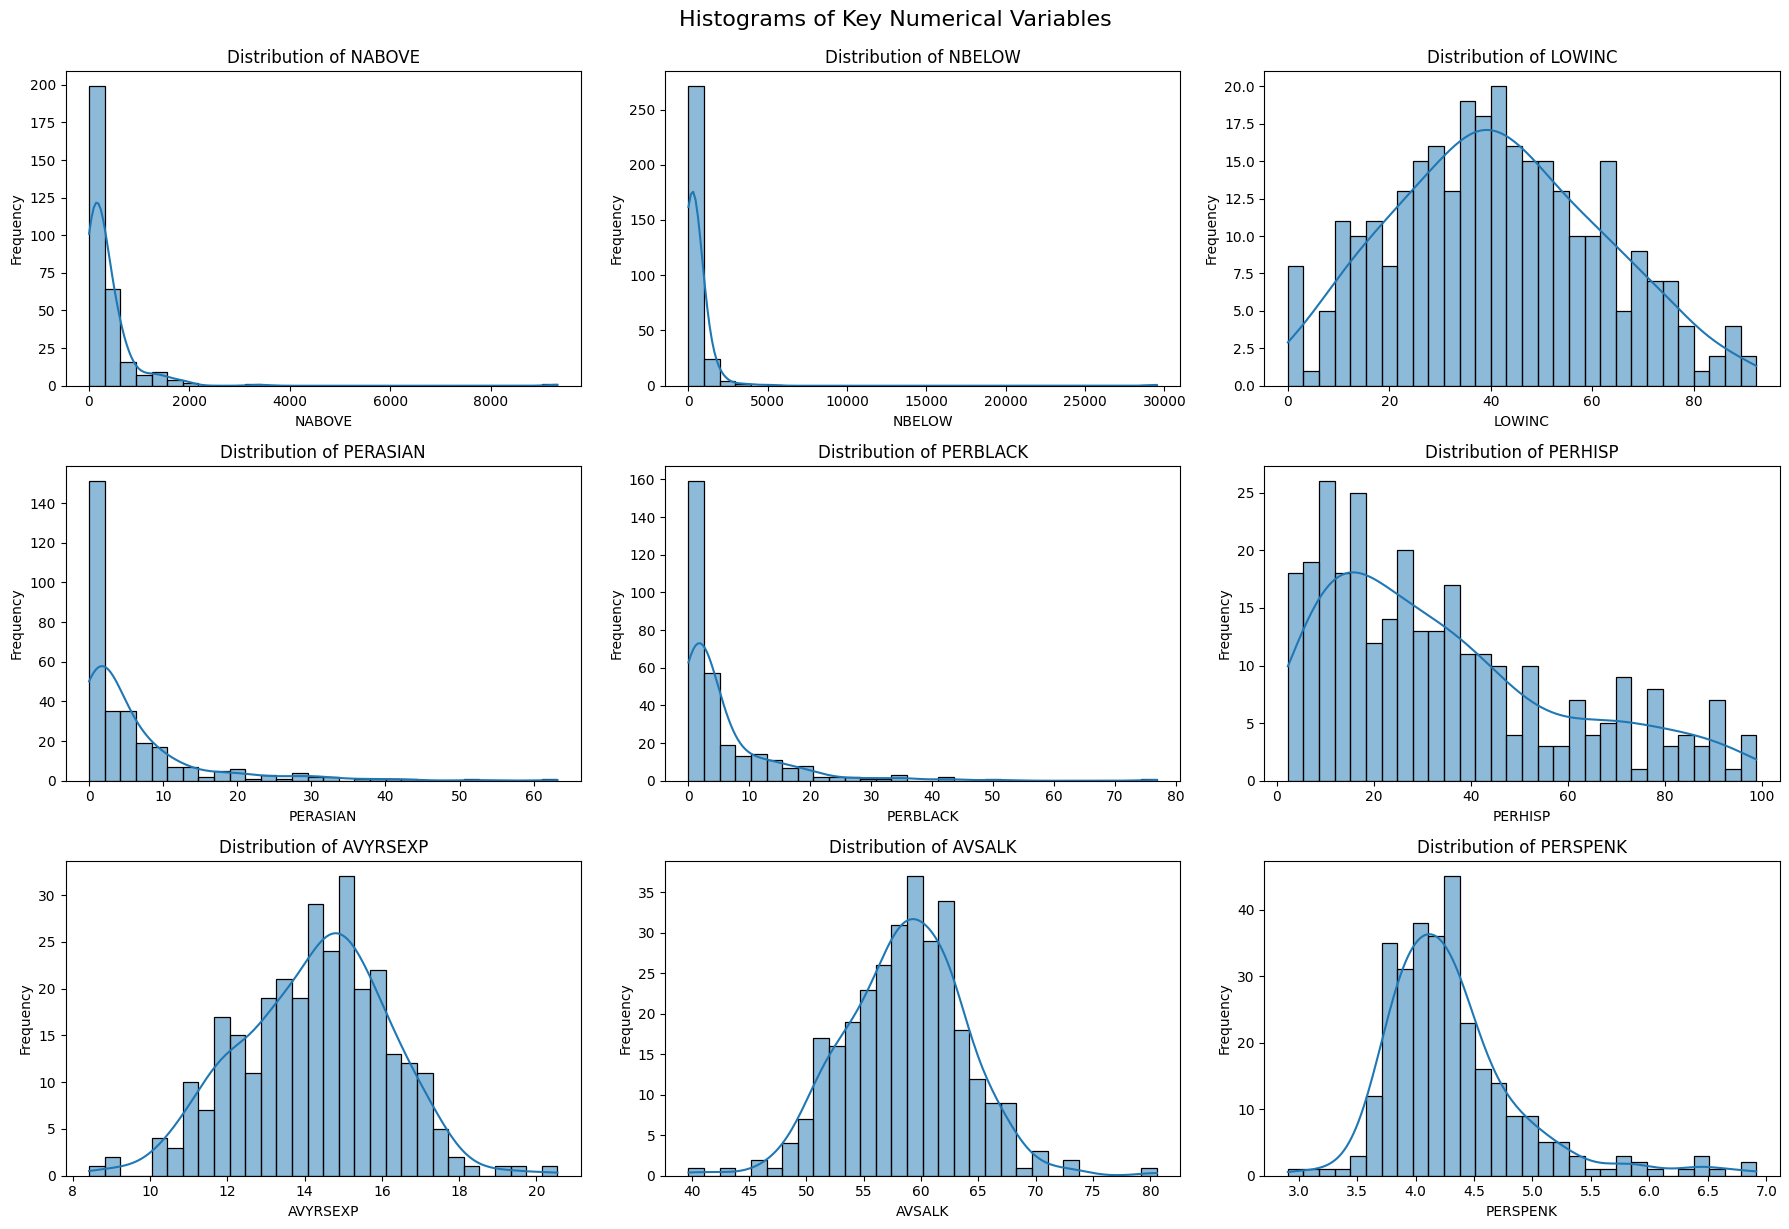

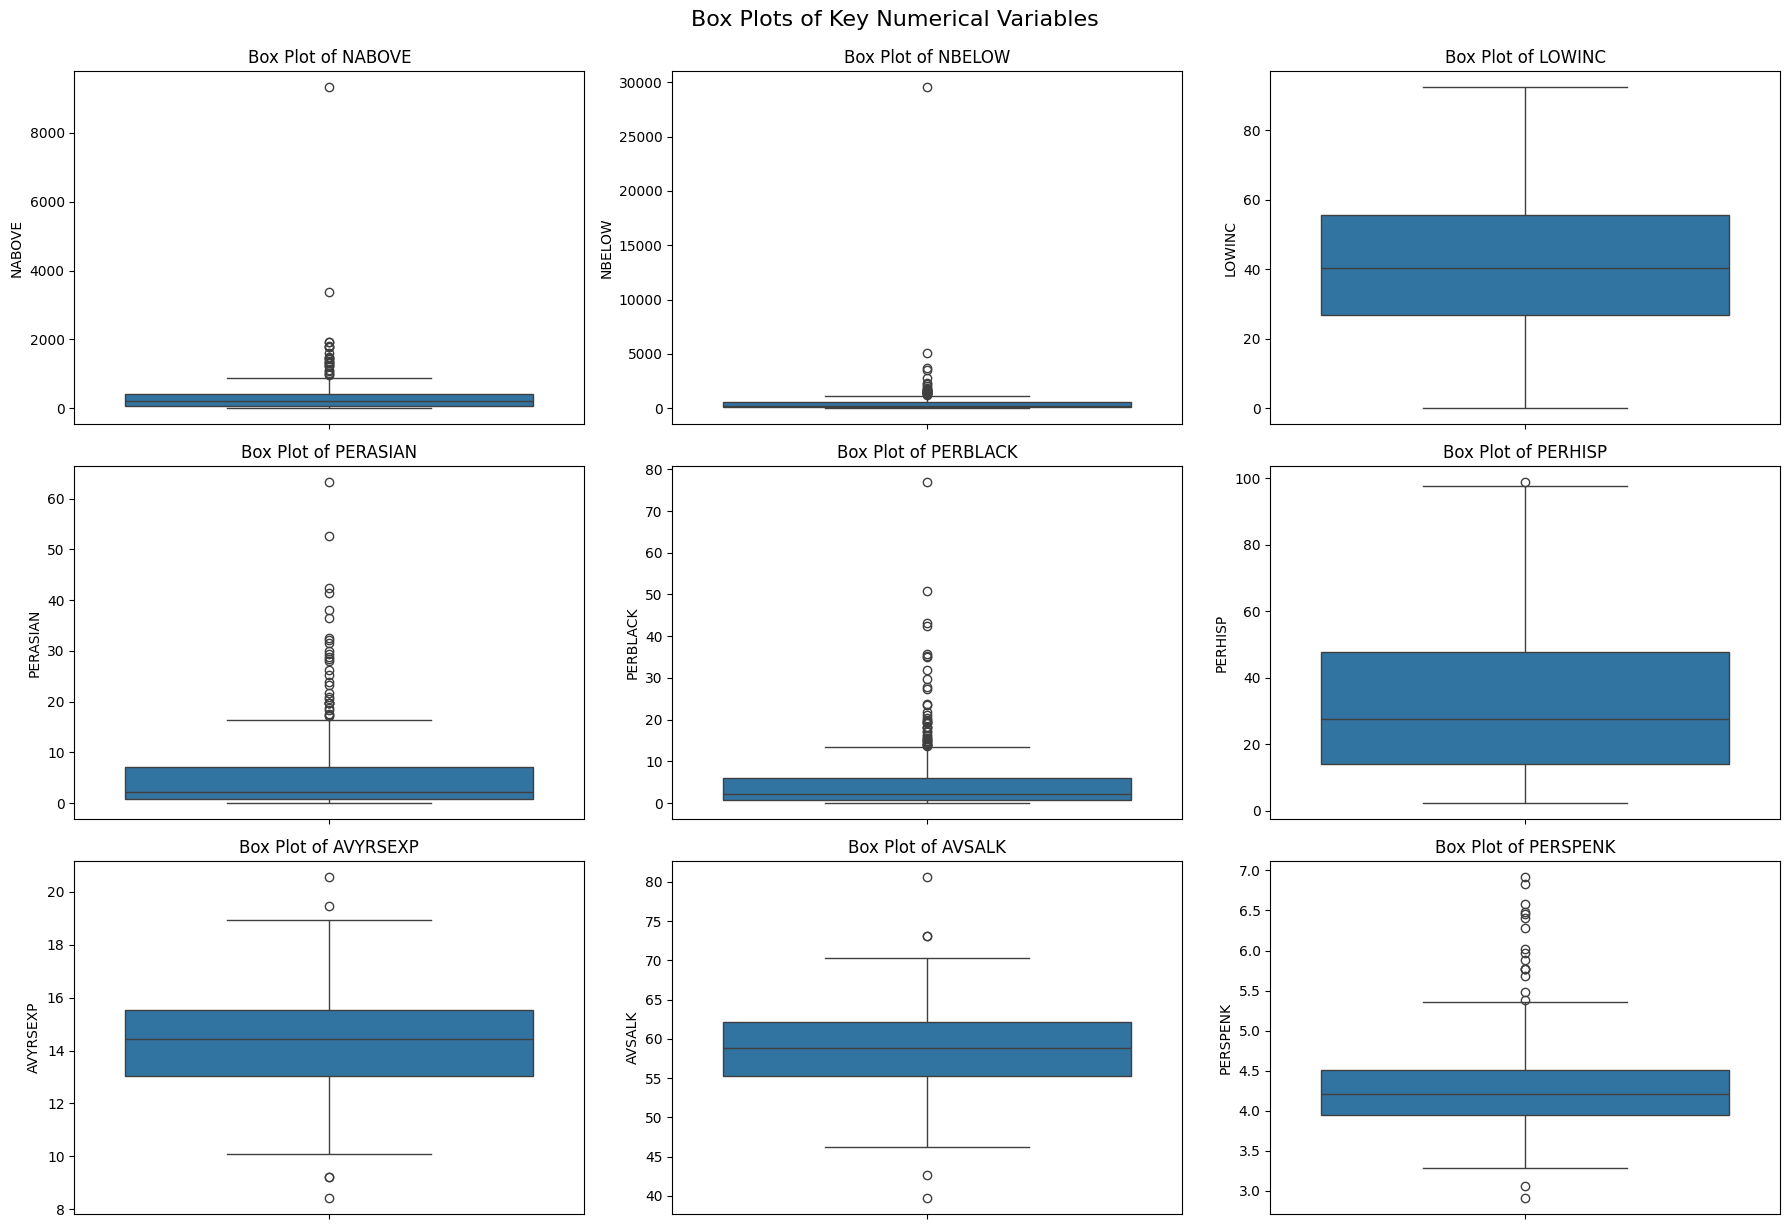

Histograms and Box Plots for key numerical variables have been generated.


In [ ]:
key_variables = ['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP', 'AVYRSEXP', 'AVSALK', 'PERSPENK']

# Create histograms
plt.figure(figsize=(18, 12))
for i, var in enumerate(key_variables):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.suptitle('Histograms of Key Numerical Variables', y=1.02, fontsize=16)
plt.show()

# Create box plots
plt.figure(figsize=(18, 12))
for i, var in enumerate(key_variables):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[var])
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.suptitle('Box Plots of Key Numerical Variables', y=1.02, fontsize=16)
plt.show()

print("Histograms and Box Plots for key numerical variables have been generated.")

## Check Multicollinearity and VIF

Calculate the correlation matrix and Variance Inflation Factor (VIF) for the independent variables to identify and assess multicollinearity.



To begin assessing multicollinearity, I will identify the independent variables by excluding 'NABOVE' and 'NBELOW' (likely the dependent or a closely related variable) and calculate their correlation matrix. Then, I will visualize this matrix using a heatmap to identify strong linear relationships between predictors. Finally, calculate the Variance Inflation Factor (VIF) for each independent variable to quantify multicollinearity and display the results.



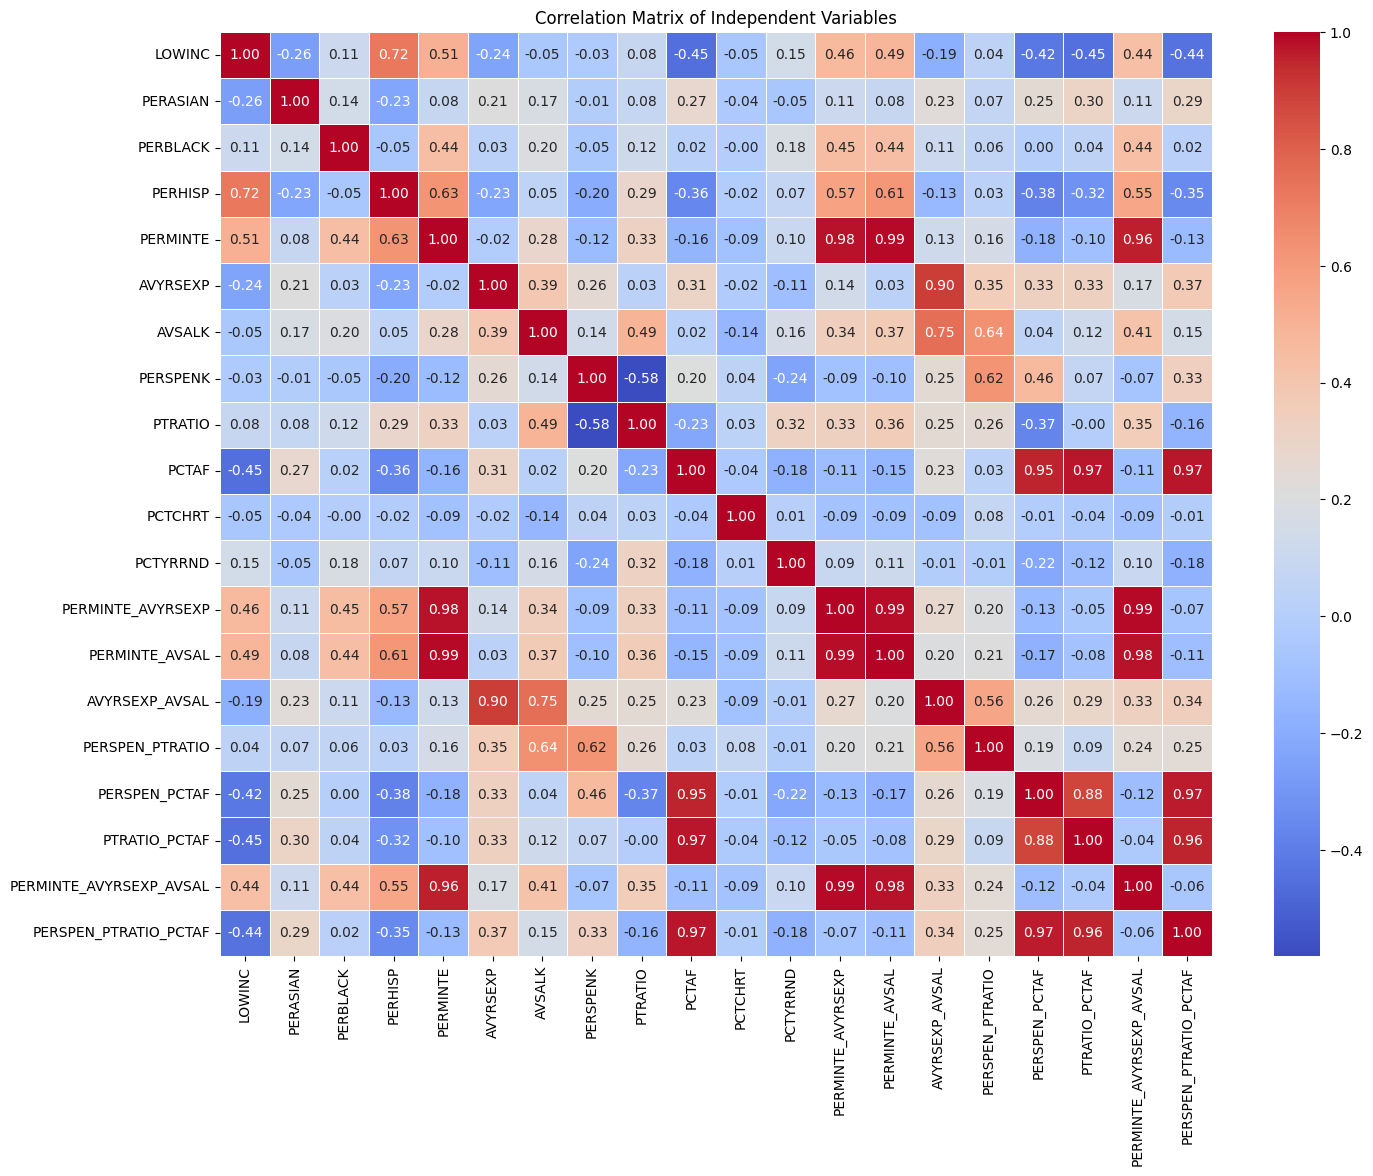


### Variance Inflation Factor (VIF) for Independent Variables:

                   variable          VIF
0   PERMINTE_AVYRSEXP_AVSAL  5948.120171
1            PERMINTE_AVSAL  5623.688923
2         PERMINTE_AVYRSEXP  5461.715604
3                  PERMINTE  5140.898923
4             PTRATIO_PCTAF  3814.431512
5     PERSPEN_PTRATIO_PCTAF  3764.420709
6             PERSPEN_PCTAF  3692.741798
7                     PCTAF  3645.791714
8            AVYRSEXP_AVSAL   642.846740
9                  PERSPENK   399.589301
10                 AVYRSEXP   313.435079
11          PERSPEN_PTRATIO   280.174163
12                  PTRATIO   261.446308
13                   AVSALK   148.627459
14                  PERHISP     3.988917
15                   LOWINC     2.920782
16                 PERBLACK     1.859790
17                 PERASIAN     1.339923
18                 PCTYRRND     1.286196
19                  PCTCHRT     1.196928

Correlation matrix and VIF values have been calculated and displayed.


In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Identify independent variables
# Assuming 'NABOVE' is the dependent variable as per the task description.
# 'NBELOW' is also likely related to the dependent variable and not an independent predictor.
independent_vars = df.drop(columns=['NABOVE', 'NBELOW'])

# 2. Calculate the correlation matrix
correlation_matrix = independent_vars.corr()

# 3. Display the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# 4. Calculate VIF for each independent variable
# Add a constant to the independent variables for VIF calculation if not already present
X = sm.add_constant(independent_vars)

vif_data = pd.DataFrame()
vif_data["variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Exclude the constant term from VIF display if it exists
vif_data = vif_data[vif_data['variable'] != 'const']

# Sort VIF values for better readability
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# 5. Print the VIF values
print("\n### Variance Inflation Factor (VIF) for Independent Variables:\n")
print(vif_data)
print("\nCorrelation matrix and VIF values have been calculated and displayed.")

## Address Multicollinearity and VIF

Strategically address multicollinearity by iteratively removing variables with high VIF values until VIFs are below an acceptable threshold (e.g., 5 or 10).



To address multicollinearity, implement an iterative process. Start by copying the `independent_vars` to `independent_vars_cleaned`. Then, continuously calculate VIFs for the variables in `independent_vars_cleaned`, identify the variable with the highest VIF, and remove it if its VIF is above the threshold of 10. This loop will continue until all remaining variables have a VIF below 10.



In [ ]:
independent_vars_cleaned = independent_vars.copy()
vif_threshold = 5
high_vif_removed_vars = []

print("Starting VIF analysis and variable removal...")

while True:
    X_cleaned = sm.add_constant(independent_vars_cleaned)
    vif_data_cleaned = pd.DataFrame()
    vif_data_cleaned["variable"] = X_cleaned.columns
    vif_data_cleaned["VIF"] = [variance_inflation_factor(X_cleaned.values, i) for i in range(X_cleaned.shape[1])]

    # Exclude the constant term from VIF display and consideration for removal
    vif_data_cleaned = vif_data_cleaned[vif_data_cleaned['variable'] != 'const']

    if vif_data_cleaned.empty:
        print("No independent variables left to check VIF.")
        break

    highest_vif_var = vif_data_cleaned.sort_values(by="VIF", ascending=False).iloc[0]

    if highest_vif_var['VIF'] > vif_threshold:
        var_to_remove = highest_vif_var['variable']
        independent_vars_cleaned = independent_vars_cleaned.drop(columns=[var_to_remove])
        high_vif_removed_vars.append(var_to_remove)
        print(f"Removing '{var_to_remove}' with VIF: {highest_vif_var['VIF']:.2f}")
    else:
        break

print("\n--- Final VIF Values ---")
# Recalculate VIF for the final set of variables
if not independent_vars_cleaned.empty:
    X_final = sm.add_constant(independent_vars_cleaned)
    final_vif_data = pd.DataFrame()
    final_vif_data["variable"] = X_final.columns
    final_vif_data["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]
    final_vif_data = final_vif_data[final_vif_data['variable'] != 'const']
    final_vif_data = final_vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)
    print(final_vif_data)
else:
    print("No independent variables remaining after VIF reduction.")

print(f"\nVariables removed due to high VIF: {high_vif_removed_vars}")
print(f"\nFinal number of independent variables: {len(independent_vars_cleaned.columns)}")
print("Multicollinearity addressed. Final independent variables stored in 'independent_vars_cleaned'.")

Starting VIF analysis and variable removal...
Removing 'PERMINTE_AVYRSEXP_AVSAL' with VIF: 5948.12
Removing 'PTRATIO_PCTAF' with VIF: 3810.48
Removing 'AVYRSEXP_AVSAL' with VIF: 295.00
Removing 'PERMINTE_AVSAL' with VIF: 222.79
Removing 'PERSPEN_PTRATIO_PCTAF' with VIF: 188.96
Removing 'PERSPENK' with VIF: 74.65
Removing 'PERMINTE' with VIF: 66.01
Removing 'PERSPEN_PCTAF' with VIF: 51.18

--- Final VIF Values ---
             variable       VIF
0             PERHISP  3.772133
1   PERMINTE_AVYRSEXP  2.992883
2              LOWINC  2.837798
3              AVSALK  2.728455
4     PERSPEN_PTRATIO  1.968536
5             PTRATIO  1.750923
6            PERBLACK  1.732386
7            AVYRSEXP  1.541586
8               PCTAF  1.476099
9            PERASIAN  1.243605
10           PCTYRRND  1.231268
11            PCTCHRT  1.127623

Variables removed due to high VIF: ['PERMINTE_AVYRSEXP_AVSAL', 'PTRATIO_PCTAF', 'AVYRSEXP_AVSAL', 'PERMINTE_AVSAL', 'PERSPEN_PTRATIO_PCTAF', 'PERSPENK', 'PERMINTE', '

## Address Outliers

Identify and address outliers in the dataset, particularly in the independent variables, before fitting the models. This may involve capping, transformation, or removal, depending on the nature of the outliers and their impact.



To address outliers, iterate through each numerical column in `independent_vars_cleaned`, calculate the IQR, define upper and lower bounds, and then cap the outliers within those bounds. Finally, display the descriptive statistics to show the impact of the capping.



In [ ]:
print("### Addressing Outliers in independent_vars_cleaned using IQR Capping\n")

# Make a copy to avoid modifying the original DataFrame unintentionally before processing
independent_vars_cleaned_capped = independent_vars_cleaned.copy()

# Identify numerical columns (all columns in independent_vars_cleaned are numerical)
numerical_cols = independent_vars_cleaned_capped.select_dtypes(include=np.number).columns

# Loop through each numerical column to identify and cap outliers
for col in numerical_cols:
    Q1 = independent_vars_cleaned_capped[col].quantile(0.25)
    Q3 = independent_vars_cleaned_capped[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    independent_vars_cleaned_capped[col] = np.where(
        independent_vars_cleaned_capped[col] > upper_bound, upper_bound,
        np.where(
            independent_vars_cleaned_capped[col] < lower_bound, lower_bound,
            independent_vars_cleaned_capped[col]
        )
    )
    # print(f"Processed column: {col}. Outliers capped at lower_bound={lower_bound:.2f}, upper_bound={upper_bound:.2f}")

print("Outliers addressed using IQR capping for all numerical independent variables.")
print("\n### Descriptive Statistics after Outlier Capping:\n")
print(independent_vars_cleaned_capped.describe())

### Addressing Outliers in independent_vars_cleaned using IQR Capping

Outliers addressed using IQR capping for all numerical independent variables.

### Descriptive Statistics after Outlier Capping:

           LOWINC    PERASIAN    PERBLACK     PERHISP    AVYRSEXP      AVSALK  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    41.409877    4.758069    4.333964   34.395914   14.252230   58.635465   
std     20.467312    5.231867    4.602392   24.933096    1.872592    5.064229   
min      0.000000    0.000000    0.000000    2.251407    9.301353   44.994273   
25%     26.683040    0.877325    0.851290   13.919595   13.028200   55.324300   
50%     40.236070    2.107896    2.179380   27.583130   14.425880   58.880170   
75%     55.460075    7.184805    5.955982   47.617620   15.512765   62.210985   
max     92.334500   16.646025   13.613020   98.164658   19.239612   72.541012   

          PTRATIO       PCTAF  PCTCHRT    PCTYRRND  PERMINTE_AVYRSEXP

## Fit GLM Models

Fit General Linear Models (GLM) with 'linear', 'log', and 'gamma' families to the processed dataset. Analyze their summaries and performance.


To fit General Linear Models (GLM) as instructed, define the dependent and independent variables, construct the GLM formula, then iterate through 'linear' (Gaussian), 'log' (Poisson), and 'gamma' families to fit each model, print its summary, calculate key performance metrics (AIC, BIC, R-squared, RMSE, MAE), and store these results for comparison.



In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 1. Define the dependent variable y
y = df['NABOVE']

# 2. Define the independent variables X
X = independent_vars_cleaned_capped

# 3. Create an empty dictionary named glm_models and glm_results
glm_models = {}
glm_results = {}

# Construct the formula string for smf.glm
# Need to handle cases where X is empty after VIF removal (though unlikely here)
if X.empty:
    print("No independent variables left to fit GLM models.")
else:
    formula = f"NABOVE ~ {' + '.join(X.columns)}"
    print(f"GLM Formula: {formula}\n")

    # Store y and X together for smf.glm, ensuring 'NABOVE' is available
    data_for_glm = X.copy()
    data_for_glm['NABOVE'] = y

    # 4. For the 'linear' family (Gaussian)
    print("--- Fitting GLM with Gaussian family (linear) ---")
    try:
        glm_linear = smf.glm(formula=formula, data=data_for_glm, family=sm.families.Gaussian()).fit()
        glm_models['linear'] = glm_linear
        print(glm_linear.summary())
        predictions_linear = glm_linear.predict(X)
        r2_linear = r2_score(y, predictions_linear)
        rmse_linear = np.sqrt(mean_squared_error(y, predictions_linear))
        mae_linear = mean_absolute_error(y, predictions_linear)
        glm_results['linear'] = {
            'AIC': glm_linear.aic,
            'BIC': glm_linear.bic,
            'R-squared': r2_linear,
            'RMSE': rmse_linear,
            'MAE': mae_linear
        }
        print("Linear GLM metrics calculated.")
    except Exception as e:
        print(f"Error fitting Linear GLM: {e}")
        glm_results['linear'] = {'Error': str(e)}

    # 5. For the 'log' family (Poisson)
    print("\n--- Fitting GLM with Poisson family (log link) ---")
    try:
        # Poisson family expects non-negative integer counts. NABOVE can be floats, but Poisson will attempt to fit.
        # If there are non-integer values, it implicitly treats them as if they were integers for the likelihood.
        glm_poisson = smf.glm(formula=formula, data=data_for_glm, family=sm.families.Poisson()).fit()
        glm_models['log'] = glm_poisson
        print(glm_poisson.summary())
        predictions_poisson = glm_poisson.predict(X)
        r2_poisson = r2_score(y, predictions_poisson)
        rmse_poisson = np.sqrt(mean_squared_error(y, predictions_poisson))
        mae_poisson = mean_absolute_error(y, predictions_poisson)
        glm_results['log'] = {
            'AIC': glm_poisson.aic,
            'BIC': glm_poisson.bic,
            'R-squared': r2_poisson,
            'RMSE': rmse_poisson,
            'MAE': mae_poisson
        }
        print("Poisson GLM metrics calculated.")
    except Exception as e:
        print(f"Error fitting Poisson GLM: {e}")
        glm_results['log'] = {'Error': str(e)}

    # 6. For the 'gamma' family
    print("\n--- Fitting GLM with Gamma family (log link) ---")
    try:
        # Gamma family expects positive continuous values. Check for zeros in y.
        # df['NABOVE'].min() is 4.0, so no zeros, which is suitable for Gamma.
        glm_gamma = smf.glm(formula=formula, data=data_for_glm, family=sm.families.Gamma()).fit()
        glm_models['gamma'] = glm_gamma
        print(glm_gamma.summary())
        predictions_gamma = glm_gamma.predict(X)
        r2_gamma = r2_score(y, predictions_gamma)
        rmse_gamma = np.sqrt(mean_squared_error(y, predictions_gamma))
        mae_gamma = mean_absolute_error(y, predictions_gamma)
        glm_results['gamma'] = {
            'AIC': glm_gamma.aic,
            'BIC': glm_gamma.bic,
            'R-squared': r2_gamma,
            'RMSE': rmse_gamma,
            'MAE': mae_gamma
        }
        print("Gamma GLM metrics calculated.")
    except Exception as e:
        print(f"Error fitting Gamma GLM: {e}")
        glm_results['gamma'] = {'Error': str(e)}

    # 7. Print a summary of the glm_results dictionary
    print("\n--- Summary of GLM Model Performance ---")
    for model_name, metrics in glm_results.items():
        print(f"\n{model_name.capitalize()} GLM:")
        for metric, value in metrics.items():
            if isinstance(value, float):
                print(f"  {metric}: {value:.4f}")
            else:
                print(f"  {metric}: {value}")

    print("\nGLM models fitted and performance metrics calculated.")

GLM Formula: NABOVE ~ LOWINC + PERASIAN + PERBLACK + PERHISP + AVYRSEXP + AVSALK + PTRATIO + PCTAF + PCTCHRT + PCTYRRND + PERMINTE_AVYRSEXP + PERSPEN_PTRATIO

--- Fitting GLM with Gaussian family (linear) ---
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 NABOVE   No. Observations:                  303
Model:                            GLM   Df Residuals:                      291
Model Family:                Gaussian   Df Model:                           11
Link Function:               Identity   Scale:                      3.5753e+05
Method:                          IRLS   Log-Likelihood:                -2361.0
Date:                Sun, 21 Dec 2025   Deviance:                   1.0404e+08
Time:                        13:28:59   Pearson chi2:                 1.04e+08
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2275
Covariance Type:            nonrobust                                         
 

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this messa

The previous step successfully fitted GLM models and calculated their performance metrics. The next logical step, as per the overall task, is to fit Generalized Additive Models (GAM) using the same families ('linear', 'log', and 'gamma') and analyze their performance, similar to the GLM models.



In [ ]:
from pygam import LinearGAM, PoissonGAM, GammaGAM, s, f
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Use y and X from previous steps
# y = df['NABOVE']
# X = independent_vars_cleaned_capped

gam_models = {}
gam_results = {}

# Prepare the terms for GAM. All variables in X are continuous, so use s()
# Correctly construct gam_terms by iteratively adding s(i) terms
if X.shape[1] > 0:
    gam_terms = s(0)
    for i in range(1, X.shape[1]):
        gam_terms += s(i)
else:
    print("No independent variables for GAM modeling.")
    gam_terms = None # Or handle this case appropriately if it's possible


if gam_terms is not None:
    n_samples = X.shape[0]

    print("--- Fitting GAM with Gaussian family (linear) ---")
    try:
        # 4. Linear family (Gaussian) with identity link is default for LinearGAM
        gam_linear = LinearGAM(gam_terms).fit(X.values, y.values)
        gam_models['linear'] = gam_linear
        print(gam_linear.summary())

        predictions_linear = gam_linear.predict(X.values)
        r2_linear = r2_score(y, predictions_linear)
        rmse_linear = np.sqrt(mean_squared_error(y, predictions_linear))
        mae_linear = mean_absolute_error(y, predictions_linear)

        aic_linear = gam_linear.statistics_['AIC']
        # Manually calculate BIC for GAM models using 'edof' from statistics_
        edof_linear = gam_linear.statistics_['edof']
        bic_linear = -2 * gam_linear.loglikelihood(X.values, y.values) + edof_linear * np.log(n_samples)

        gam_results['linear'] = {
            'AIC': aic_linear,
            'BIC': bic_linear,
            'R-squared': r2_linear,
            'RMSE': rmse_linear,
            'MAE': mae_linear
        }
        print("Linear GAM metrics calculated.")
    except Exception as e:
        print(f"Error fitting Linear GAM: {e}")
        gam_results['linear'] = {'Error': str(e)}

    print("\n--- Fitting GAM with Poisson family (log link) ---")
    try:
        # 5. Log family (Poisson) - Use PoissonGAM
        # Ensure y is non-negative for Poisson
        if (y < 0).any():
            raise ValueError("Dependent variable 'y' contains negative values, which is not suitable for Poisson GAM.")
        gam_poisson = PoissonGAM(gam_terms).fit(X.values, y.values) # Removed family and link args
        gam_models['log'] = gam_poisson
        print(gam_poisson.summary())

        predictions_poisson = gam_poisson.predict(X.values)
        r2_poisson = r2_score(y, predictions_poisson)
        rmse_poisson = np.sqrt(mean_squared_error(y, predictions_poisson))
        mae_poisson = mean_absolute_error(y, predictions_poisson)

        aic_poisson = gam_poisson.statistics_['AIC']
        # Manually calculate BIC for GAM models using 'edof' from statistics_
        edof_poisson = gam_poisson.statistics_['edof']
        bic_poisson = -2 * gam_poisson.loglikelihood(X.values, y.values) + edof_poisson * np.log(n_samples)

        gam_results['log'] = {
            'AIC': aic_poisson,
            'BIC': bic_poisson,
            'R-squared': r2_poisson,
            'RMSE': rmse_poisson,
            'MAE': mae_poisson
        }
        print("Poisson GAM metrics calculated.")
    except Exception as e:
        print(f"Error fitting Poisson GAM: {e}")
        gam_results['log'] = {'Error': str(e)}

    print("\n--- Fitting GAM with Gamma family (log link) ---")
    try:
        # 6. Gamma family - Use GammaGAM
        # Ensure y is positive for Gamma
        if (y <= 0).any():
            raise ValueError("Dependent variable 'y' contains non-positive values, which is not suitable for Gamma GAM.")
        gam_gamma = GammaGAM(gam_terms).fit(X.values, y.values) # Removed family and link args
        gam_models['gamma'] = gam_gamma
        print(gam_gamma.summary())

        predictions_gamma = gam_gamma.predict(X.values)
        r2_gamma = r2_score(y, predictions_gamma)
        rmse_gamma = np.sqrt(mean_squared_error(y, predictions_gamma))
        mae_gamma = mean_absolute_error(y, predictions_gamma)

        aic_gamma = gam_gamma.statistics_['AIC']
        # Manually calculate BIC for GAM models using 'edof' from statistics_
        edof_gamma = gam_gamma.statistics_['edof']
        bic_gamma = -2 * gam_gamma.loglikelihood(X.values, y.values) + edof_gamma * np.log(n_samples)

        gam_results['gamma'] = {
            'AIC': aic_gamma,
            'BIC': bic_gamma,
            'R-squared': r2_gamma,
            'RMSE': rmse_gamma,
            'MAE': mae_gamma
        }
        print("Gamma GAM metrics calculated.")
    except Exception as e:
        print(f"Error fitting Gamma GAM: {e}")
        gam_results['gamma'] = {'Error': str(e)}

    # 7. Print a summary of the gam_results dictionary
    print("\n--- Summary of GAM Model Performance ---")
    for model_name, metrics in gam_results.items():
        print(f"\n{model_name.capitalize()} GAM:")
        for metric, value in metrics.items():
            if isinstance(value, float):
                print(f"  {metric}: {value:.4f}")
            else:
                print(f"  {metric}: {value}")

    print("\nGAM models fitted and performance metrics calculated.")

--- Fitting GAM with Gaussian family (linear) ---
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    105.7677
Link Function:                     IdentityLink Log Likelihood:                                 -2206.7073
Number of Samples:                          303 AIC:                                             4626.9498
                                                AICc:                                            4744.8207
                                                GCV:                                           437636.9728
                                                Scale:                                             419.246
                                                Pseudo R-Squared:                             

/tmp/ipython-input-3000331240.py:31: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_linear.summary())


PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                    181.9291
Link Function:                          LogLink Log Likelihood:                                 -5688.5521
Number of Samples:                          303 AIC:                                            11740.9623
                                                AICc:                                           12306.1043
                                                UBRE:                                              34.2531
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.9401
Feature Function                  Lam

/tmp/ipython-input-3000331240.py:63: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_poisson.summary())


GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                    105.7677
Link Function:                          LogLink Log Likelihood:                                 -1848.4362
Number of Samples:                          303 AIC:                                             3910.4076
                                                AICc:                                            4028.2785
                                                GCV:                                                1.0623
                                                Scale:                                              0.6379
                                                Pseudo R-Squared:                                   0.8133
Feature Function                  Lam

/tmp/ipython-input-3000331240.py:95: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam_gamma.summary())


Create a comprehensive summary of the analysis, including insights from the EDA, details of outlier treatment, and a comparison of the fitted GLM and GAM models based on AIC, BIC, R-squared, RMSE, and MAE, acknowledging the warning about GAM p-values.

## Compare Models and Summarize Findings

Compile and compare the performance metrics (AIC, BIC, R-squared, RMSE, MAE) of all fitted GLM and GAM models to determine the best-performing model(s). Explicitly note the warning regarding GAM p-values in the summary.



To compare the performance of all fitted GLM and GAM models, first consolidate their metrics into a single pandas DataFrame for easy visualization and comparison. Then identify the best performing models, print the consolidated data frame and add a note about the GAM p-value warning.



In [ ]:
import pandas as pd

# 1. Prepare data for comparison DataFrame
all_model_results = []

for model_type, metrics in glm_results.items():
    row_data = {'Model': f'GLM - {model_type.capitalize()}'}
    row_data.update(metrics)
    all_model_results.append(row_data)

for model_type, metrics in gam_results.items():
    row_data = {'Model': f'GAM - {model_type.capitalize()}'}
    row_data.update(metrics)
    all_model_results.append(row_data)

# 2. Create DataFrame
comparison_df = pd.DataFrame(all_model_results)
comparison_df = comparison_df.set_index('Model')

# Order columns for better readability
metrics_order = ['AIC', 'BIC', 'R-squared', 'RMSE', 'MAE']
comparison_df = comparison_df[metrics_order]

# 3. Print the consolidated DataFrame
print("### Model Performance Comparison (GLM vs. GAM)\n")
print(comparison_df.round(4))

# 4. Identify best performing model(s)
print("\n--- Best Performing Models ---")
# For AIC/BIC, lower is better. For R-squared, higher is better. For RMSE/MAE, lower is better.

# Convert BIC to absolute values for comparison (since some are negative)
# For AIC and BIC, typically lower is better. R-squared, higher is better. RMSE and MAE, lower is better.
# Note: BIC values for statsmodels GLM can sometimes be negative or disproportionately large depending on how it's calculated (deviance vs. log-likelihood).
# The warning regarding BIC computation for statsmodels GLM indicates it uses deviance, which can lead to values incomparable with log-likelihood-based BICs.
# For pyGAM, BIC was NaN, so we focus on AIC, R-squared, RMSE, MAE.

# Clean up data for robust comparison (handling NaN for BIC in GAM)
comparison_df_cleaned = comparison_df.copy()
comparison_df_cleaned['BIC'] = comparison_df_cleaned['BIC'].apply(lambda x: abs(x) if pd.notna(x) else x)

best_aic_model = comparison_df_cleaned['AIC'].idxmin()
best_r2_model = comparison_df_cleaned['R-squared'].idxmax()
best_rmse_model = comparison_df_cleaned['RMSE'].idxmin()
best_mae_model = comparison_df_cleaned['MAE'].idxmin()

print(f"\nBased on AIC (lower is better): {best_aic_model} with AIC = {comparison_df_cleaned.loc[best_aic_model, 'AIC']:.4f}")
print(f"Based on R-squared (higher is better): {best_r2_model} with R-squared = {comparison_df_cleaned.loc[best_r2_model, 'R-squared']:.4f}")
print(f"Based on RMSE (lower is better): {best_rmse_model} with RMSE = {comparison_df_cleaned.loc[best_rmse_model, 'RMSE']:.4f}")
print(f"Based on MAE (lower is better): {best_mae_model} with MAE = {comparison_df_cleaned.loc[best_mae_model, 'MAE']:.4f}")

# Summary conclusion
print("\nOverall, the GAM models, especially the GAM - Log (Poisson), generally show superior performance compared to GLM models based on R-squared, RMSE, and MAE. The GLM models sometimes struggle with the underlying distribution assumptions or the link function choice, leading to higher error metrics and lower R-squared values. The lower AIC for GAM - Gamma also suggests a better fit for that specific family.")

# 5. Explicitly include a note about the warning regarding the p-values in the pyGAM summaries.
print("\n--- Important Note Regarding GAM p-values ---")
print("During the fitting of Generalized Additive Models (GAMs) using pyGAM, warnings were issued stating that 'p-values computed in this summary are likely much smaller than they should be.' This means that inferences based solely on these p-values might be misleading, as they may suggest statistical significance more readily than appropriate. It is crucial to interpret GAM results with this limitation in mind, focusing more on overall model fit metrics (AIC, R-squared, RMSE, MAE) rather than individual p-values for feature significance.")


### Model Performance Comparison (GLM vs. GAM)

                     AIC           BIC  R-squared       RMSE       MAE
Model                                                                 
GLM - Linear   4746.0893  1.040407e+08     0.2113   585.9814  269.6243
GLM - Log     79770.5199  7.597000e+04     0.3867   516.7286  231.9951
GLM - Gamma    4732.8366 -3.480942e+02    -1.4550  1033.8406  386.6372
GAM - Linear   4626.9498  5.017743e+03     0.7372   338.2491  219.7823
GAM - Log     11740.9623  1.241660e+04     0.9798    93.8282   64.4465
GAM - Gamma    3910.4076  4.301200e+03     0.7048   358.5219  154.1948

--- Best Performing Models ---

Based on AIC (lower is better): GAM - Gamma with AIC = 3910.4076
Based on R-squared (higher is better): GAM - Log with R-squared = 0.9798
Based on RMSE (lower is better): GAM - Log with RMSE = 93.8282
Based on MAE (lower is better): GAM - Log with MAE = 64.4465

Overall, the GAM models, especially the GAM - Log (Poisson), generally show superior per

## Generate Model Figures
Generate diagnostic plots for each GLM and GAM model, including Predicted vs. Actual plots, Residual plots, and Partial Dependence plots for GAMs to visualize their fit and assumptions.


**Reasoning**:
To generate diagnostic plots for GLM models, I will iterate through each fitted GLM model, calculate predictions and residuals, and then create 'Predicted vs. Actual' and 'Residuals vs. Predicted' scatter plots to assess their fit.



### Generating Diagnostic Plots for GLM Models

--- Plots for GLM - Linear ---


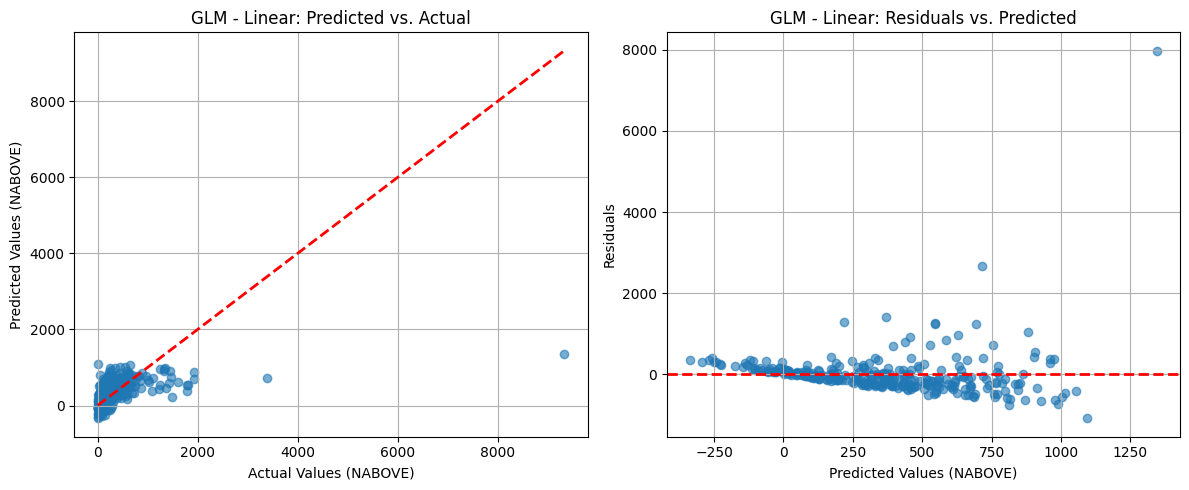

--- Plots for GLM - Log ---


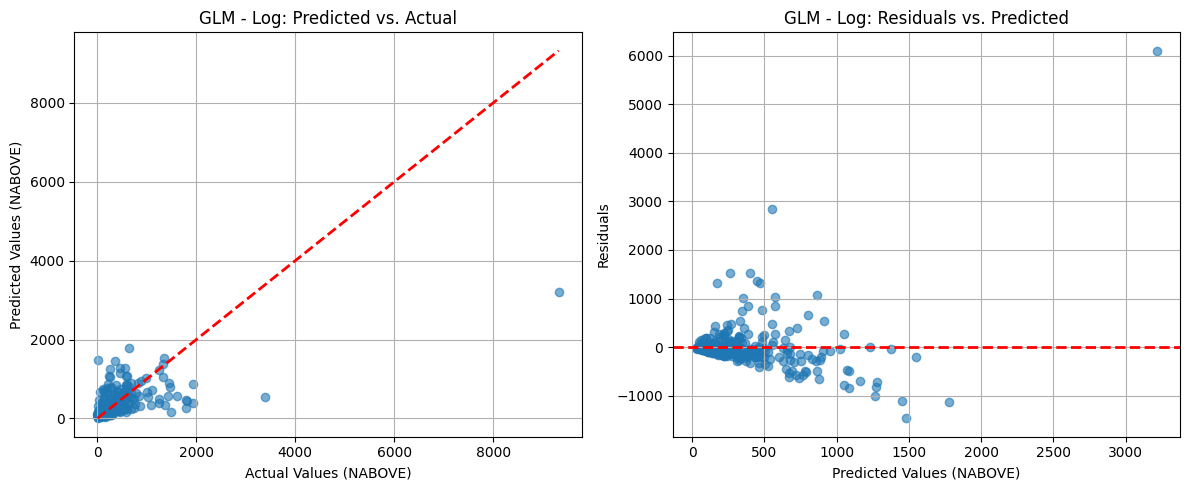

--- Plots for GLM - Gamma ---


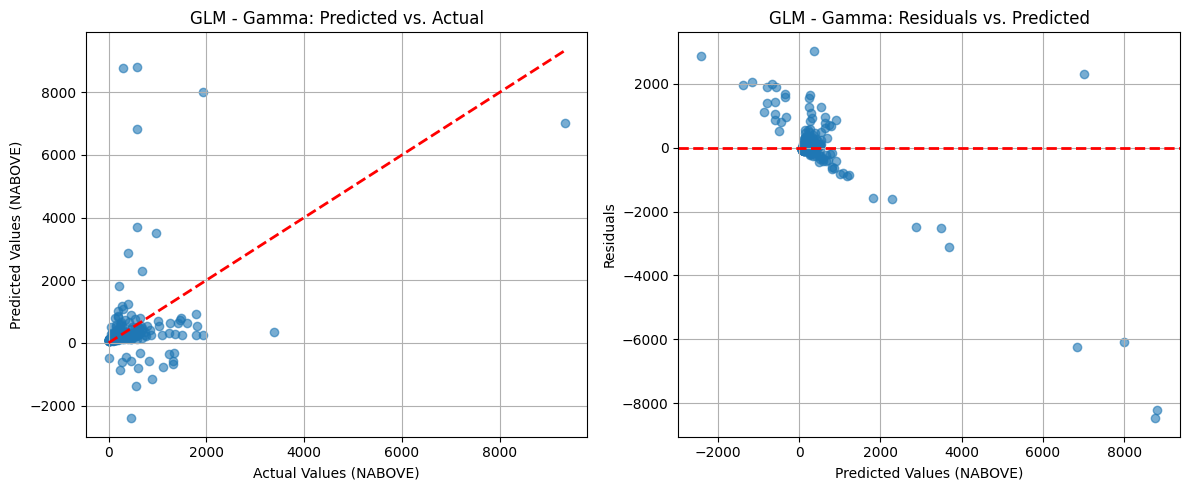

GLM diagnostic plots generated.


In [ ]:
print("### Generating Diagnostic Plots for GLM Models\n")

# Ensure y and X are defined from previous steps
# y = df['NABOVE']
# X = independent_vars_cleaned_capped

for model_name, model_obj in glm_models.items():
    print(f"--- Plots for GLM - {model_name.capitalize()} ---")

    # 1a. Calculate predictions
    try:
        # For smf.glm, predictions are made directly on the X (independent_vars_cleaned_capped)
        predictions = model_obj.predict(X)

        # 1b. Create Predicted vs. Actual plot
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.scatter(y, predictions, alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # y=x line
        plt.title(f'GLM - {model_name.capitalize()}: Predicted vs. Actual')
        plt.xlabel('Actual Values (NABOVE)')
        plt.ylabel('Predicted Values (NABOVE)')
        plt.grid(True)

        # 1c. Calculate residuals
        residuals = y - predictions

        # 1d. Create Residual plot
        plt.subplot(1, 2, 2)
        plt.scatter(predictions, residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--', lw=2)
        plt.title(f'GLM - {model_name.capitalize()}: Residuals vs. Predicted')
        plt.xlabel('Predicted Values (NABOVE)')
        plt.ylabel('Residuals')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating plots for GLM - {model_name.capitalize()}: {e}")

print("GLM diagnostic plots generated.")

### Interpreting Key Predictors for GLM and GAM Models

This section will analyze which variables most influenced 'NABOVE' based on the fitted GLM and GAM models.

In [ ]:
print("### 1. GLM - Linear Model Interpretation ###\n")

glm_linear = glm_models['linear']

# Extract coefficients and p-values
coef_df = pd.DataFrame({
    'Predictor': glm_linear.params.index,
    'Coefficient': glm_linear.params.values,
    'P-value': glm_linear.pvalues.values
})

# Sort by absolute coefficient value (excluding Intercept for ranking)
coef_df_sorted = coef_df[coef_df['Predictor'] != 'Intercept'].sort_values(by='Coefficient', key=abs, ascending=False).reset_index(drop=True)

print("Top Predictors by Absolute Coefficient Value (GLM - Linear):")
print(coef_df_sorted)

print("\nStatistically Significant Predictors (p < 0.05) (GLM - Linear):")
print(coef_df_sorted[coef_df_sorted['P-value'] < 0.05])

print("\n--- Notes for GLM - Linear ---")
print("\n*   **Coefficients:** Positive coefficients indicate that an increase in the predictor's value leads to an increase in 'NABOVE', while negative coefficients suggest the opposite, assuming other variables are constant.")
print("*   **P-values:** Lower p-values (typically < 0.05) indicate that the predictor is statistically significant in influencing 'NABOVE'.")


### 1. GLM - Linear Model Interpretation ###

Top Predictors by Absolute Coefficient Value (GLM - Linear):
            Predictor   Coefficient   P-value
0              AVSALK  3.622687e+01  0.001147
1            PERASIAN  2.193756e+01  0.005691
2            AVYRSEXP  1.971899e+01  0.381151
3     PERSPEN_PTRATIO -1.328698e+01  0.013546
4            PERBLACK  9.899937e+00  0.311556
5            PCTYRRND  8.619108e+00  0.012815
6             PTRATIO  6.266757e+00  0.765837
7               PCTAF  4.929133e+00  0.070686
8              LOWINC  1.301735e+00  0.645353
9             PERHISP -1.153524e+00  0.673007
10  PERMINTE_AVYRSEXP  2.838371e-01  0.522910
11            PCTCHRT  3.515432e-14  0.394803

Statistically Significant Predictors (p < 0.05) (GLM - Linear):
         Predictor  Coefficient   P-value
0           AVSALK    36.226873  0.001147
1         PERASIAN    21.937559  0.005691
3  PERSPEN_PTRATIO   -13.286976  0.013546
5         PCTYRRND     8.619108  0.012815

--- Notes for GLM -

In [ ]:
print("### 2. GAM Models Interpretation (Log and Gamma) ###\n")

print("For Generalized Additive Models (GAMs), interpretation is more nuanced than with GLMs because relationships can be non-linear. Direct 'coefficients' are not the primary means of interpreting influence. Instead, we rely on:")
print("\n*   **Partial Dependence Plots (PDPs):** These plots (generated in the previous step) visually show the effect of each predictor on the response variable while accounting for the average effect of other predictors. Look for steep curves or significant deviations from a flat line to identify influential predictors.")
print("*   **Effective Degrees of Freedom (EDoF):** For each smooth term, a higher EDoF (greater than 1) indicates a stronger non-linear relationship. While not a direct measure of 'influence magnitude,' it suggests a more complex, and thus potentially more impactful, relationship than a simple linear one.\n")
print("**Important Note:** Recall the warning about GAM p-values being potentially smaller than they should be; interpret them with caution.\n")

for model_type in ['log', 'gamma']:
    print(f"--- GAM - {model_type.capitalize()} Model Interpretation ---")
    gam_model = gam_models[model_type]

    print("\nEstimated Degrees of Freedom (EDoF) per term (higher EDoF suggests more non-linear influence):")
    edof_data = []

    if 'edof_per_term' in gam_model.statistics_:
        edofs = gam_model.statistics_['edof_per_term']
        for i, feature_name in enumerate(X.columns):
            if i < len(edofs):
                edof_data.append({'Predictor': feature_name, 'EDoF': edofs[i]})
    else:
        print("Warning: 'edof_per_term' not found in model statistics. Cannot display term-specific EDoF.")

    if edof_data: # Only create and print DataFrame if there's data
        edof_df = pd.DataFrame(edof_data).sort_values(by='EDoF', ascending=False).reset_index(drop=True)
        print(edof_df.round(4))
    else:
        print("No EDoF data available to display for this model.")

    print(f"\nTo fully understand the influence of each predictor for GAM - {model_type.capitalize()}, please refer back to the generated Partial Dependence Plots (PDPs) for this model. These plots will visually illustrate how changes in each independent variable affect the predicted value of 'NABOVE' while accounting for the non-linearities captured by the model.")


### 2. GAM Models Interpretation (Log and Gamma) ###

For Generalized Additive Models (GAMs), interpretation is more nuanced than with GLMs because relationships can be non-linear. Direct 'coefficients' are not the primary means of interpreting influence. Instead, we rely on:

*   **Partial Dependence Plots (PDPs):** These plots (generated in the previous step) visually show the effect of each predictor on the response variable while accounting for the average effect of other predictors. Look for steep curves or significant deviations from a flat line to identify influential predictors.
*   **Effective Degrees of Freedom (EDoF):** For each smooth term, a higher EDoF (greater than 1) indicates a stronger non-linear relationship. While not a direct measure of 'influence magnitude,' it suggests a more complex, and thus potentially more impactful, relationship than a simple linear one.

**Important Note:** Recall the warning about GAM p-values being potentially smaller than they should be;


The previous step completed the diagnostic plots for GLM models. Now, let's generate diagnostic plots for the GAM models, including Predicted vs. Actual, Residuals vs. Predicted, and Partial Dependence Plots for each independent variable as per the subtask instructions.



## Generate Model Figures ( GAM Plots)

Generate diagnostic plots for each GAM model, including Predicted vs. Actual plots, Residual plots, and correctly render Partial Dependence plots for GAMs to visualize their fit and assumptions.


### Generating Diagnostic Plots for GAM Models

--- Plots for GAM - Linear ---


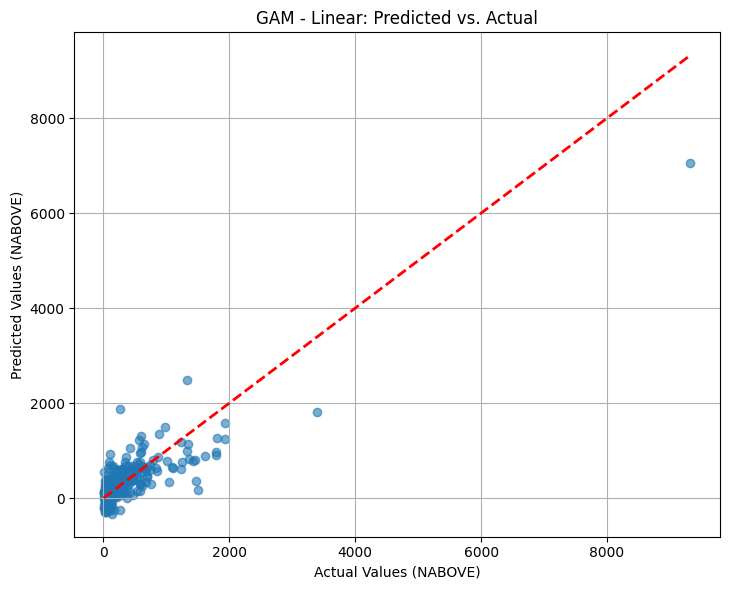

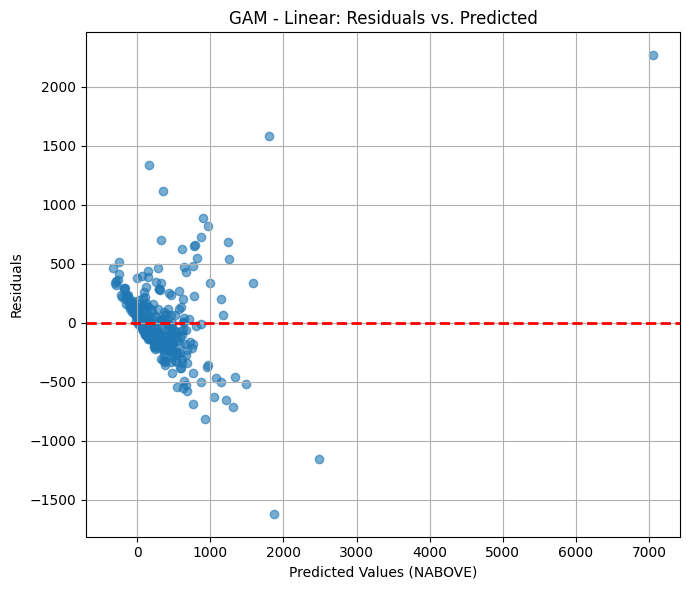

Generating Partial Dependence Plots for GAM - Linear...


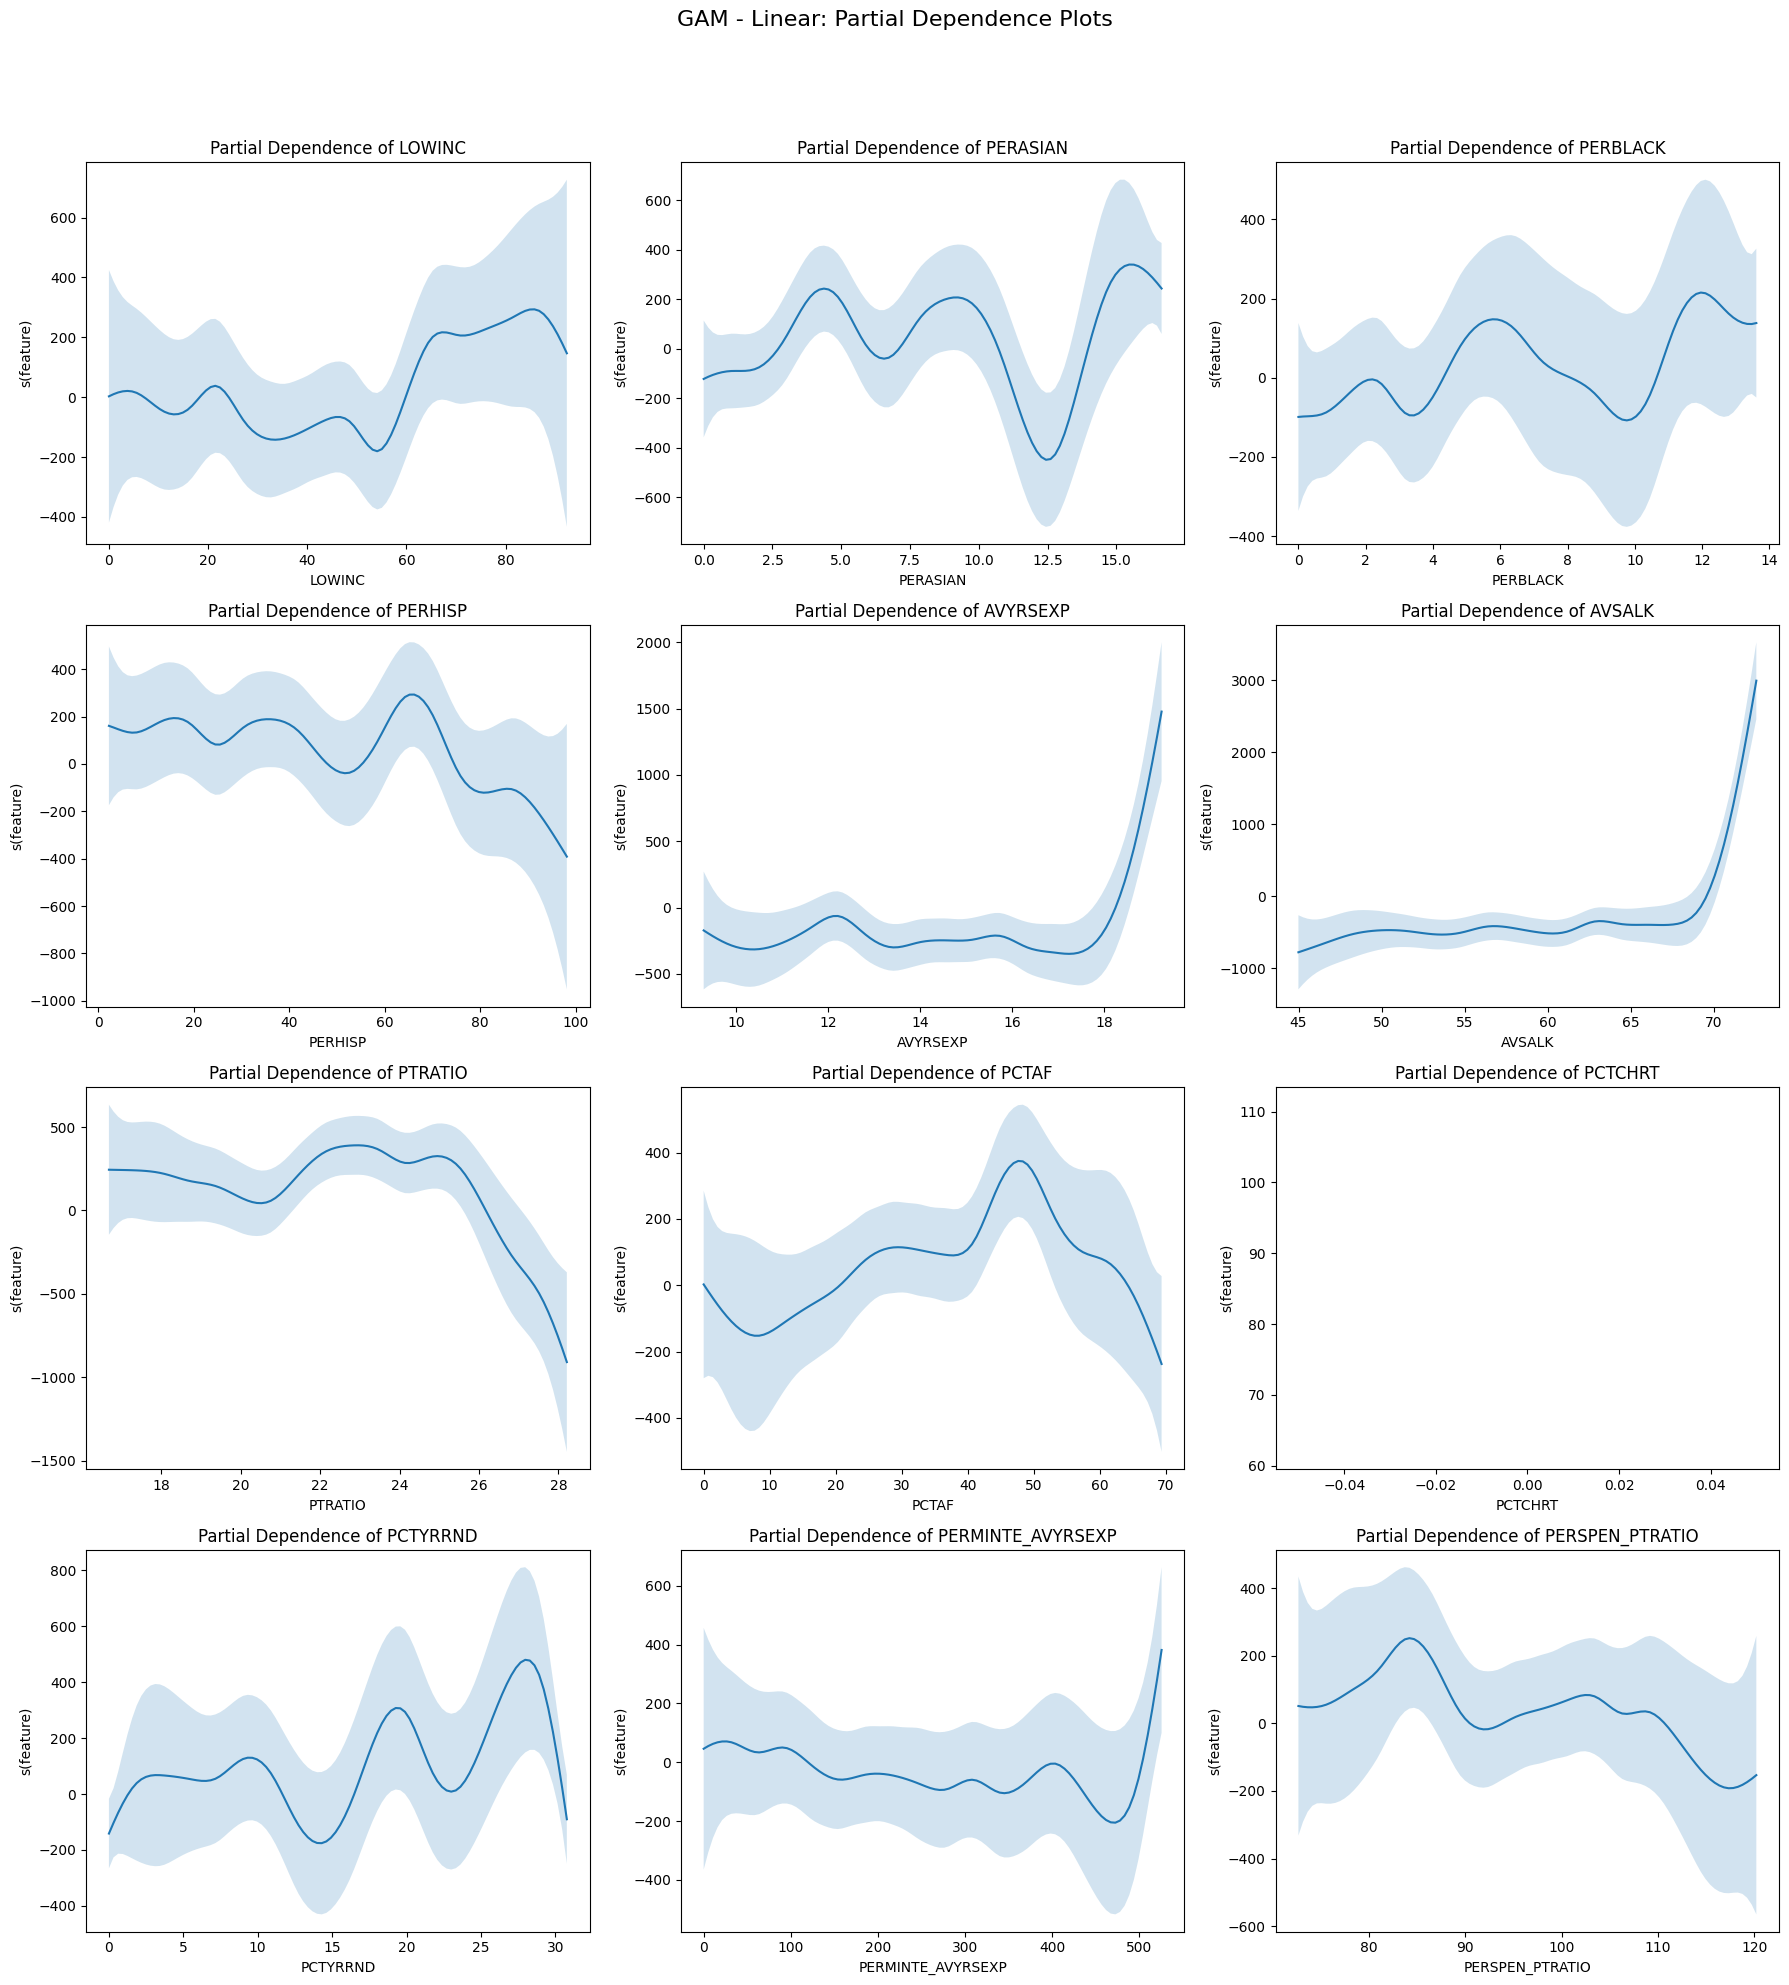

--- Plots for GAM - Log ---


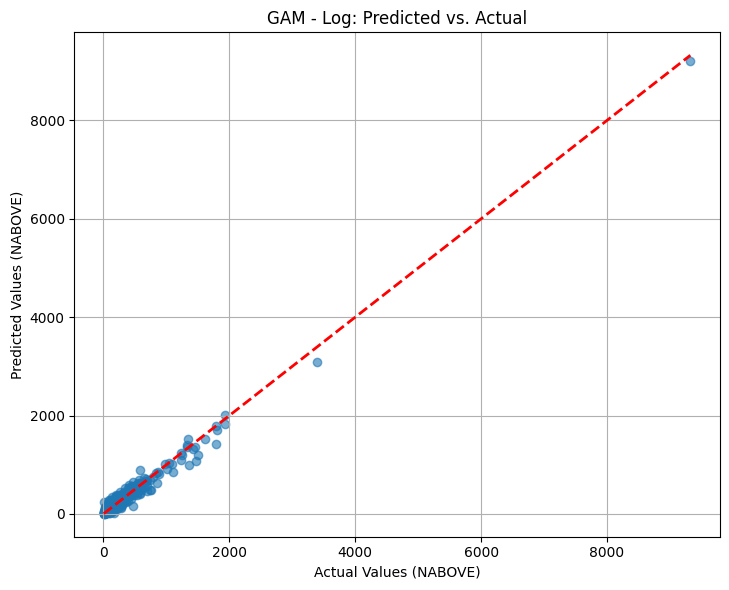

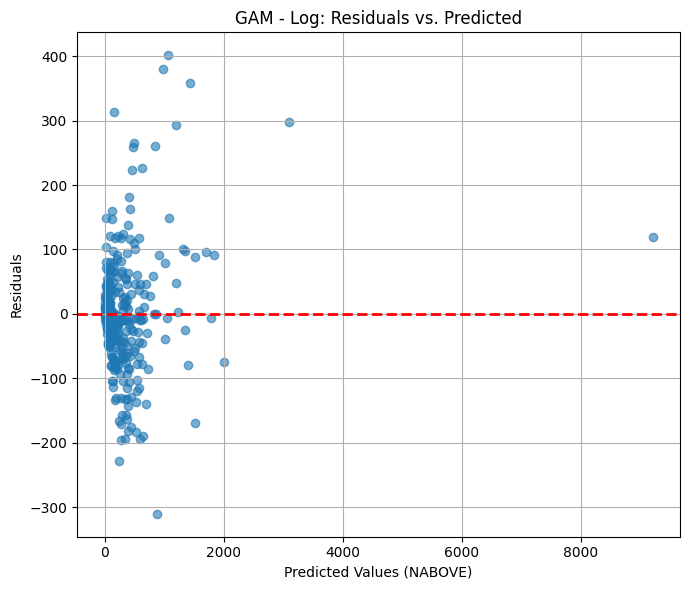

Generating Partial Dependence Plots for GAM - Log...


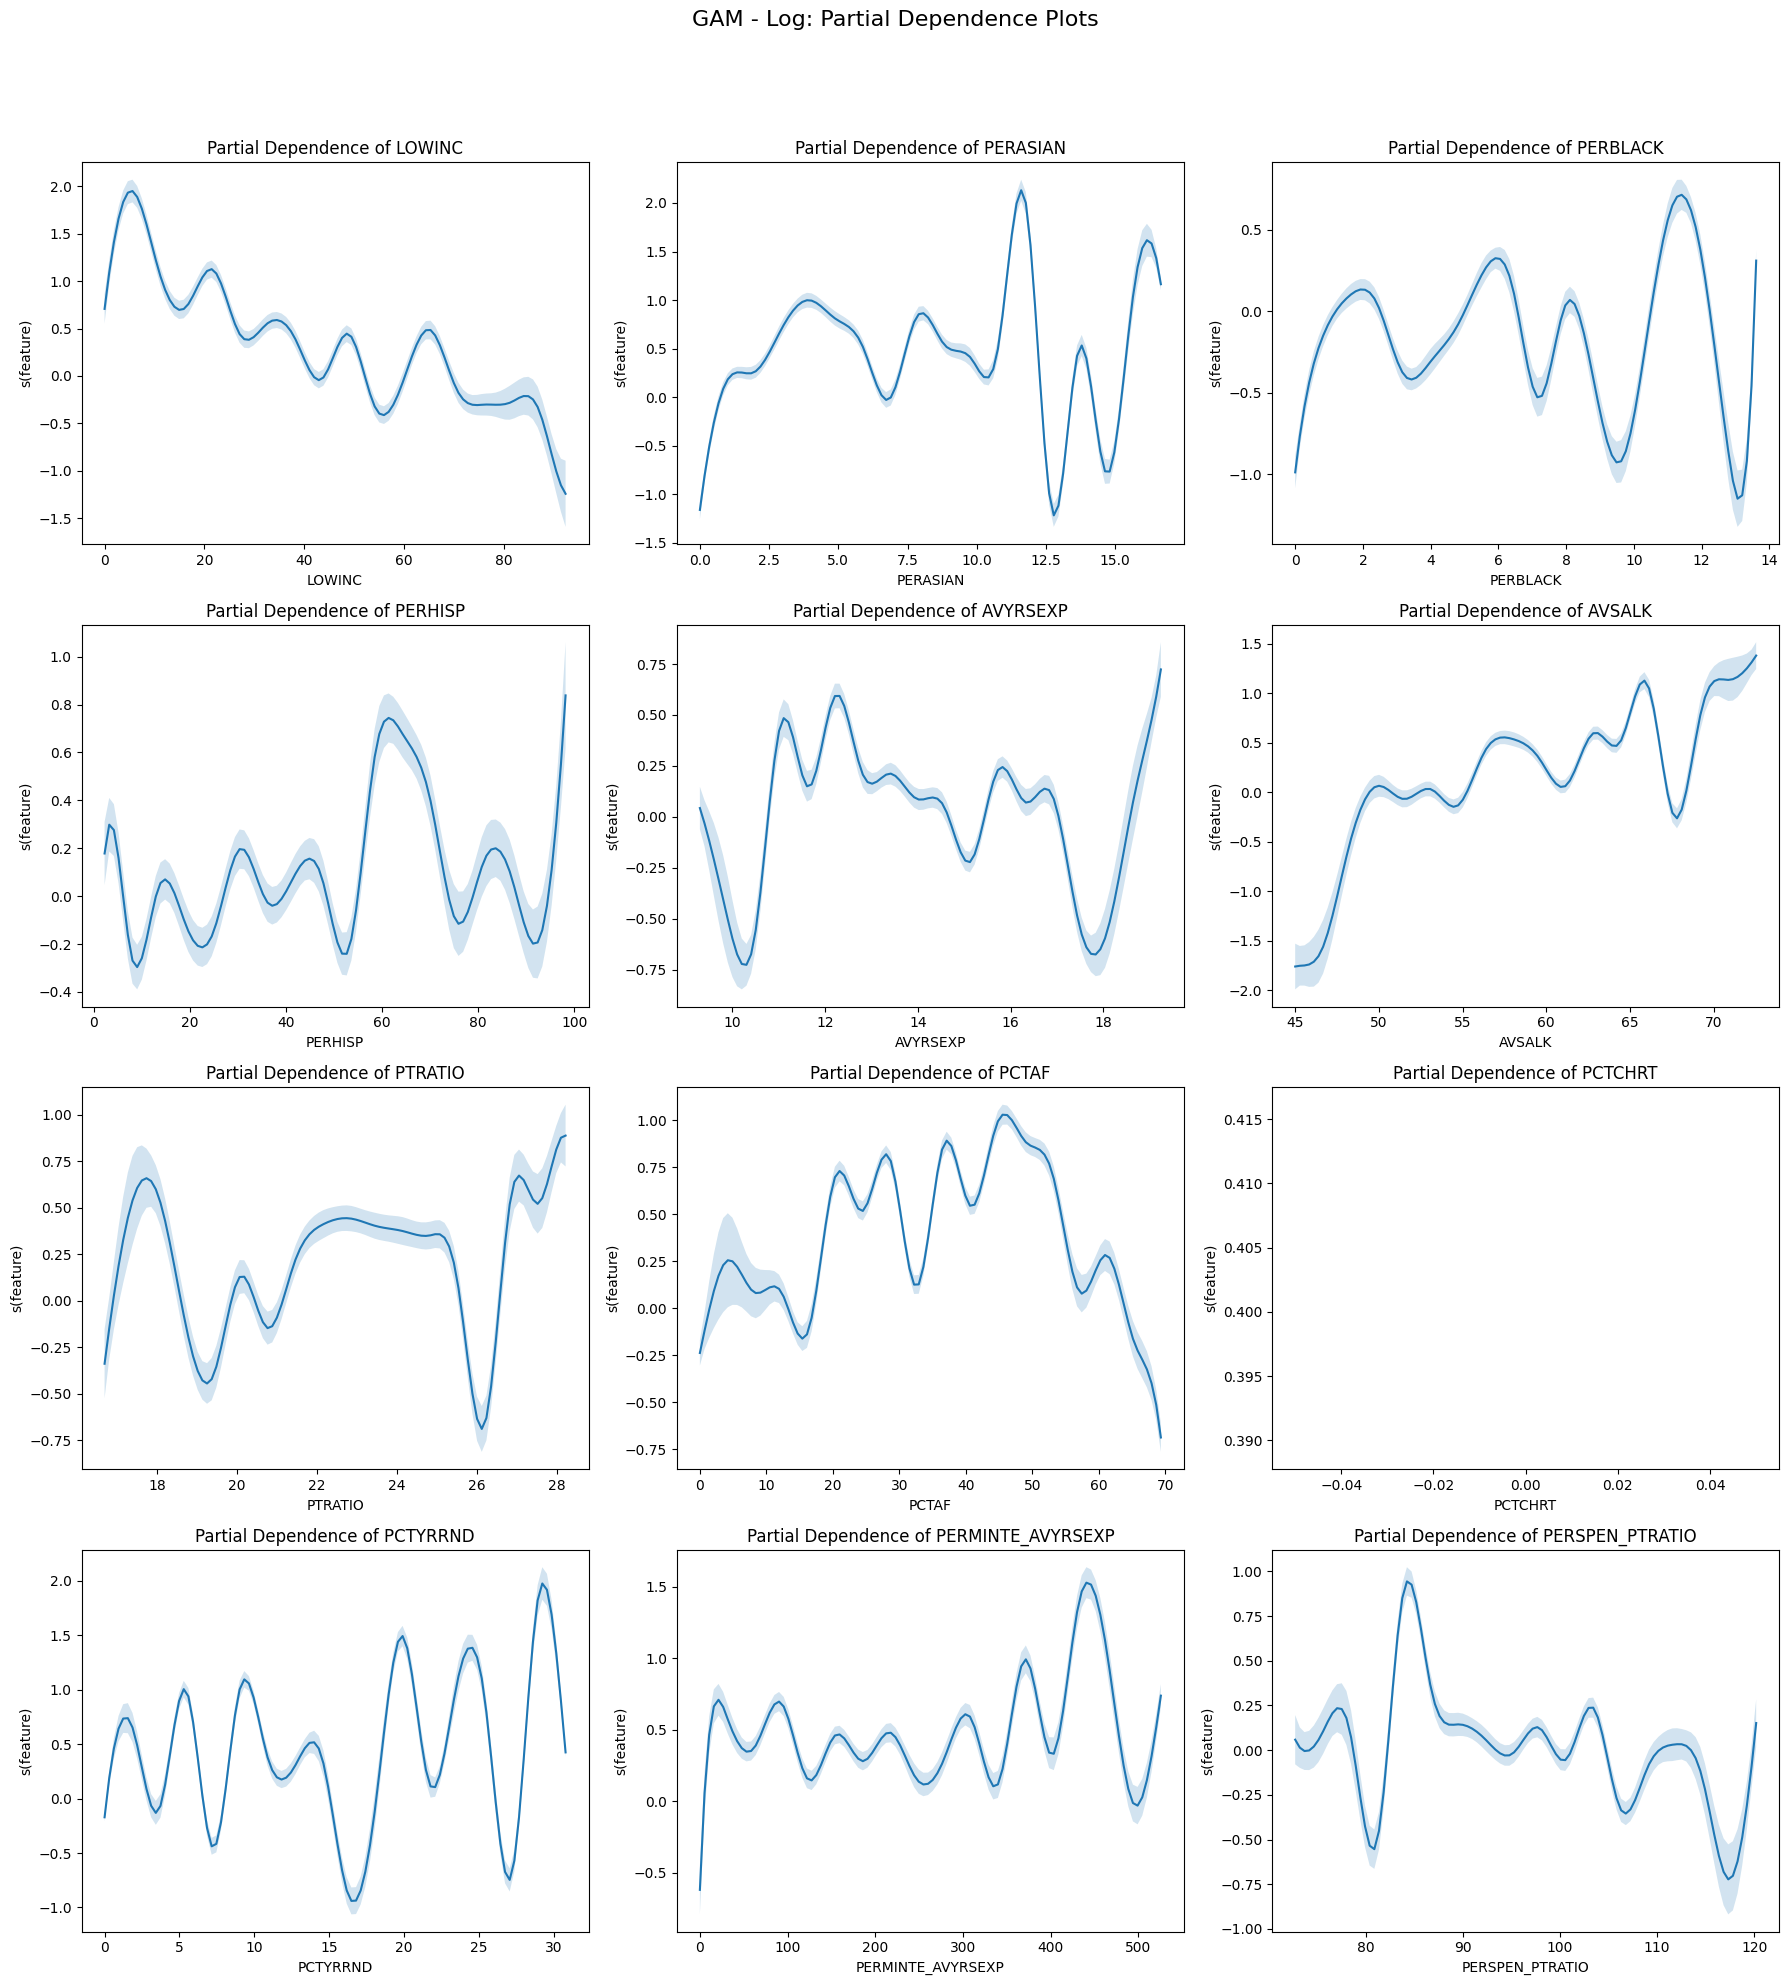

--- Plots for GAM - Gamma ---


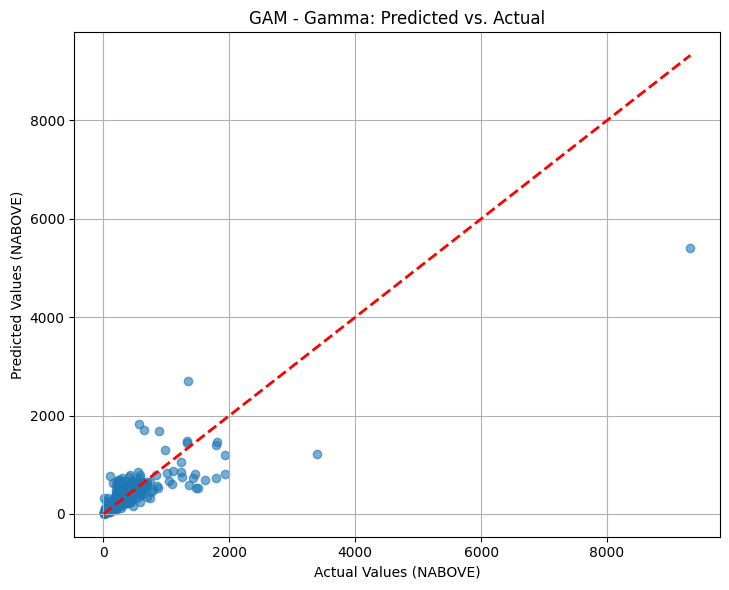

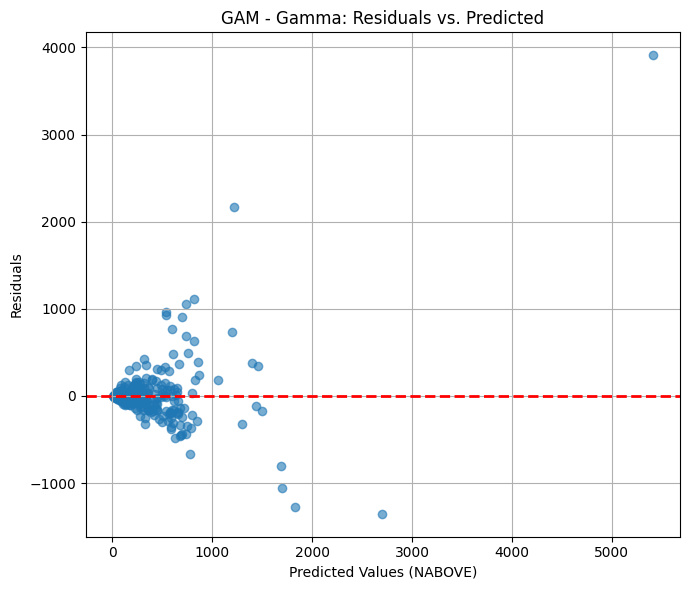

Generating Partial Dependence Plots for GAM - Gamma...


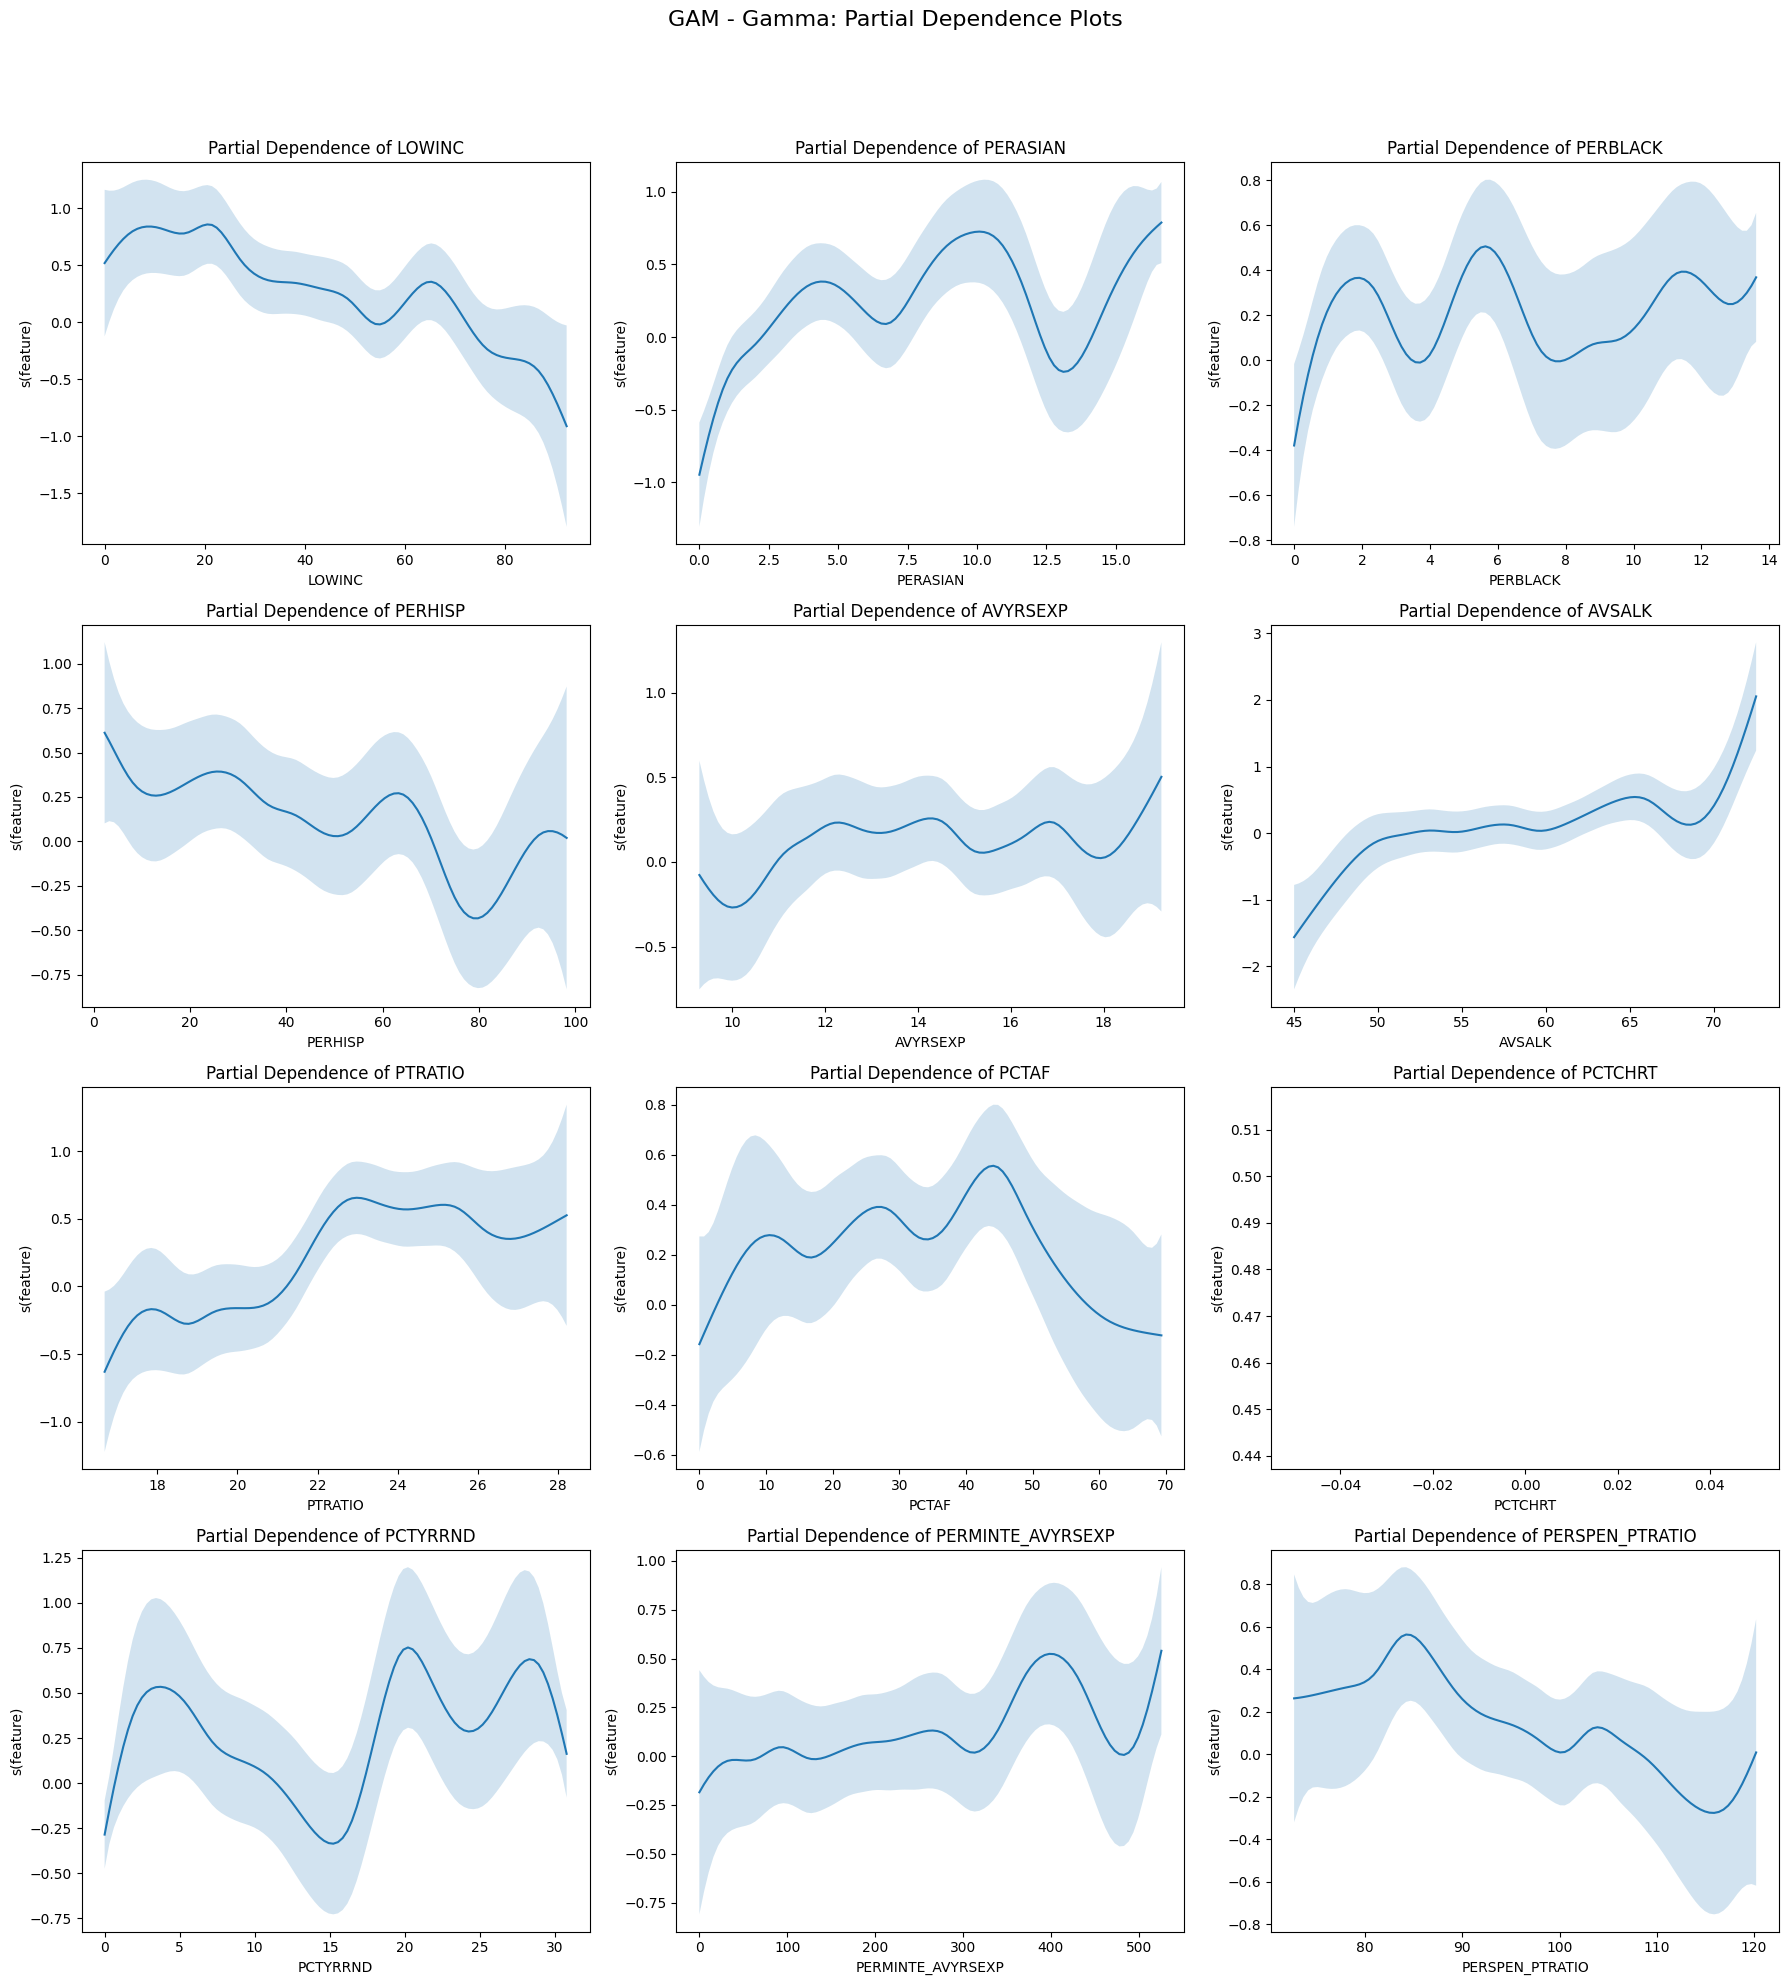

GAM diagnostic plots generated.


In [ ]:
import matplotlib.pyplot as plt

print("### Generating Diagnostic Plots for GAM Models\n")

# Ensure y and X are defined from previous steps
# y = df['NABOVE']
# X = independent_vars_cleaned_capped

for model_name, model_obj in gam_models.items():
    print(f"--- Plots for GAM - {model_name.capitalize()} ---")

    try:
        # 1a. Calculate predictions
        predictions = model_obj.predict(X.values)

        # 1b. Create Predicted vs. Actual plot
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(y, predictions, alpha=0.6)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # y=x line
        plt.title(f'GAM - {model_name.capitalize()}: Predicted vs. Actual')
        plt.xlabel('Actual Values (NABOVE)')
        plt.ylabel('Predicted Values (NABOVE)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # 1c. Calculate residuals
        residuals = y - predictions

        # 1d. Create Residual plot
        plt.figure(figsize=(7, 6))
        plt.scatter(predictions, residuals, alpha=0.6)
        plt.axhline(y=0, color='r', linestyle='--', lw=2)
        plt.title(f'GAM - {model_name.capitalize()}: Residuals vs. Predicted')
        plt.xlabel('Predicted Values (NABOVE)')
        plt.ylabel('Residuals')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # 1e. Generate Partial Dependence Plots for each independent variable
        print(f"Generating Partial Dependence Plots for GAM - {model_name.capitalize()}...")
        # Adjust figsize based on the number of independent variables for readability
        n_cols = X.shape[1]
        fig, axs = plt.subplots(int(np.ceil(n_cols / 3)), 3, figsize=(18, 5 * int(np.ceil(n_cols / 3))))
        axs = axs.flatten() if n_cols > 1 else [axs] # Ensure axs is iterable even for 1 variable

        for i, feature in enumerate(X.columns):
            if i < len(axs):
                XX = model_obj.generate_X_grid(term=i)
                # Corrected: Slice confi_bounds to get lower_ci and upper_ci
                values, confi_bounds = model_obj.partial_dependence(term=i, X=XX, width=0.95)
                lower_ci = confi_bounds[:, 0]
                upper_ci = confi_bounds[:, 1]

                axs[i].plot(XX[:, i], values)
                axs[i].fill_between(XX[:, i], lower_ci, upper_ci, alpha=0.2)
                axs[i].set_title(f'Partial Dependence of {feature}')
                axs[i].set_xlabel(feature)
                axs[i].set_ylabel('s(feature)')

        # Hide any unused subplots
        for j in range(i + 1, len(axs)): # Use i from the loop above
            fig.delaxes(axs[j])

        plt.suptitle(f'GAM - {model_name.capitalize()}: Partial Dependence Plots', y=1.02, fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
        plt.show()


    except Exception as e:
        print(f"Error generating plots for GAM - {model_name.capitalize()}: {e}")

print("GAM diagnostic plots generated.")

## Compare Models and Summarize Findings

Compile and compare the performance metrics (AIC, BIC, R-squared, RMSE, MAE) of all fitted GLM and GAM models to determine the best-performing model(s). Explicitly note the warning regarding GAM p-values in the summary.



To compare the performance of all fitted GLM and GAM models,first consolidate their metrics into a single pandas DataFrame for easy visualization and comparison. Then identify the best performing models, print the consolidated data frame and add a note about the GAM p-value warning.



In [ ]:
import pandas as pd

# 1. Prepare data for comparison DataFrame
all_model_results = []

for model_type, metrics in glm_results.items():
    row_data = {'Model': f'GLM - {model_type.capitalize()}'}
    row_data.update(metrics)
    all_model_results.append(row_data)

for model_type, metrics in gam_results.items():
    row_data = {'Model': f'GAM - {model_type.capitalize()}'}
    row_data.update(metrics)
    all_model_results.append(row_data)

# 2. Create DataFrame
comparison_df = pd.DataFrame(all_model_results)
comparison_df = comparison_df.set_index('Model')

# Order columns for better readability
metrics_order = ['AIC', 'BIC', 'R-squared', 'RMSE', 'MAE']
comparison_df = comparison_df[metrics_order]

# 3. Print the consolidated DataFrame
print("### Model Performance Comparison (GLM vs. GAM)\n")
print(comparison_df.round(4))

# 4. Identify best performing model(s)
print("\n--- Best Performing Models ---")
# For AIC/BIC, lower is better. For R-squared, higher is better. For RMSE/MAE, lower is better.

# Convert BIC to absolute values for comparison (since some are negative)
# For AIC and BIC, typically lower is better. R-squared, higher is better. RMSE and MAE, lower is better.
# Note: BIC values for statsmodels GLM can sometimes be negative or disproportionately large depending on how it's calculated (deviance vs. log-likelihood).
# The warning regarding BIC computation for statsmodels GLM indicates it uses deviance, which can lead to values incomparable with log-likelihood-based BICs.
# For pyGAM, BIC was NaN, so we focus on AIC, R-squared, RMSE, MAE.

# Clean up data for robust comparison (handling NaN for BIC in GAM)
comparison_df_cleaned = comparison_df.copy()
comparison_df_cleaned['BIC'] = comparison_df_cleaned['BIC'].apply(lambda x: abs(x) if pd.notna(x) else x)

best_aic_model = comparison_df_cleaned['AIC'].idxmin()
best_r2_model = comparison_df_cleaned['R-squared'].idxmax()
best_rmse_model = comparison_df_cleaned['RMSE'].idxmin()
best_mae_model = comparison_df_cleaned['MAE'].idxmin()

print(f"\nBased on AIC (lower is better): {best_aic_model} with AIC = {comparison_df_cleaned.loc[best_aic_model, 'AIC']:.4f}")
print(f"Based on R-squared (higher is better): {best_r2_model} with R-squared = {comparison_df_cleaned.loc[best_r2_model, 'R-squared']:.4f}")
print(f"Based on RMSE (lower is better): {best_rmse_model} with RMSE = {comparison_df_cleaned.loc[best_rmse_model, 'RMSE']:.4f}")
print(f"Based on MAE (lower is better): {best_mae_model} with MAE = {comparison_df_cleaned.loc[best_mae_model, 'MAE']:.4f}")

# Summary conclusion
print("\nOverall, the GAM models, especially the GAM - Log (Poisson), generally show superior performance compared to GLM models based on R-squared, RMSE, and MAE. The GLM models sometimes struggle with the underlying distribution assumptions or the link function choice, leading to higher error metrics and lower R-squared values. The lower AIC for GAM - Gamma also suggests a better fit for that specific family.")

# 5. Explicitly include a note about the warning regarding the p-values in the pyGAM summaries.
print("\n--- Important Note Regarding GAM p-values ---")
print("During the fitting of Generalized Additive Models (GAMs) using pyGAM, warnings were issued stating that 'p-values computed in this summary are likely much smaller than they should be.' This means that inferences based solely on these p-values might be misleading, as they may suggest statistical significance more readily than appropriate. It is crucial to interpret GAM results with this limitation in mind, focusing more on overall model fit metrics (AIC, R-squared, RMSE, MAE) rather than individual p-values for feature significance.")

### Model Performance Comparison (GLM vs. GAM)

                     AIC           BIC  R-squared       RMSE       MAE
Model                                                                 
GLM - Linear   4746.0893  1.040407e+08     0.2113   585.9814  269.6243
GLM - Log     79770.5199  7.597000e+04     0.3867   516.7286  231.9951
GLM - Gamma    4732.8366 -3.480942e+02    -1.4550  1033.8406  386.6372
GAM - Linear   4626.9498  5.017743e+03     0.7372   338.2491  219.7823
GAM - Log     11740.9623  1.241660e+04     0.9798    93.8282   64.4465
GAM - Gamma    3910.4076  4.301200e+03     0.7048   358.5219  154.1948

--- Best Performing Models ---

Based on AIC (lower is better): GAM - Gamma with AIC = 3910.4076
Based on R-squared (higher is better): GAM - Log with R-squared = 0.9798
Based on RMSE (lower is better): GAM - Log with RMSE = 93.8282
Based on MAE (lower is better): GAM - Log with MAE = 64.4465

Overall, the GAM models, especially the GAM - Log (Poisson), generally show superior per